In [1]:

%pprint
import sys
sys.path.insert(1, '../py')

Pretty printing has been turned OFF


In [12]:

%matplotlib inline
from nltk import ngrams, FreqDist, word_tokenize
from FRVRS import nu
from numpy import arange
import matplotlib.pyplot as plt
import numpy as np
import operator
import os
import random
import string
from wordcloud import WordCloud
import re
from pandas import Series

In [3]:

# load data frames
data_frames_list = nu.load_data_frames(frvrs_logs_df='')

Attempting to load /mnt/c/Users/DaveBabbitt/Documents/GitHub/itm-analysis-reporting/saves/pkl/frvrs_logs_df.pkl.


In [4]:

frvrs_logs_df = data_frames_list['frvrs_logs_df']

In [5]:

[f'string.{fn}' for fn in dir(string) if not fn.startswith('_')]

['string.Formatter', 'string.Template', 'string.ascii_letters', 'string.ascii_lowercase', 'string.ascii_uppercase', 'string.capwords', 'string.digits', 'string.hexdigits', 'string.octdigits', 'string.printable', 'string.punctuation', 'string.whitespace']

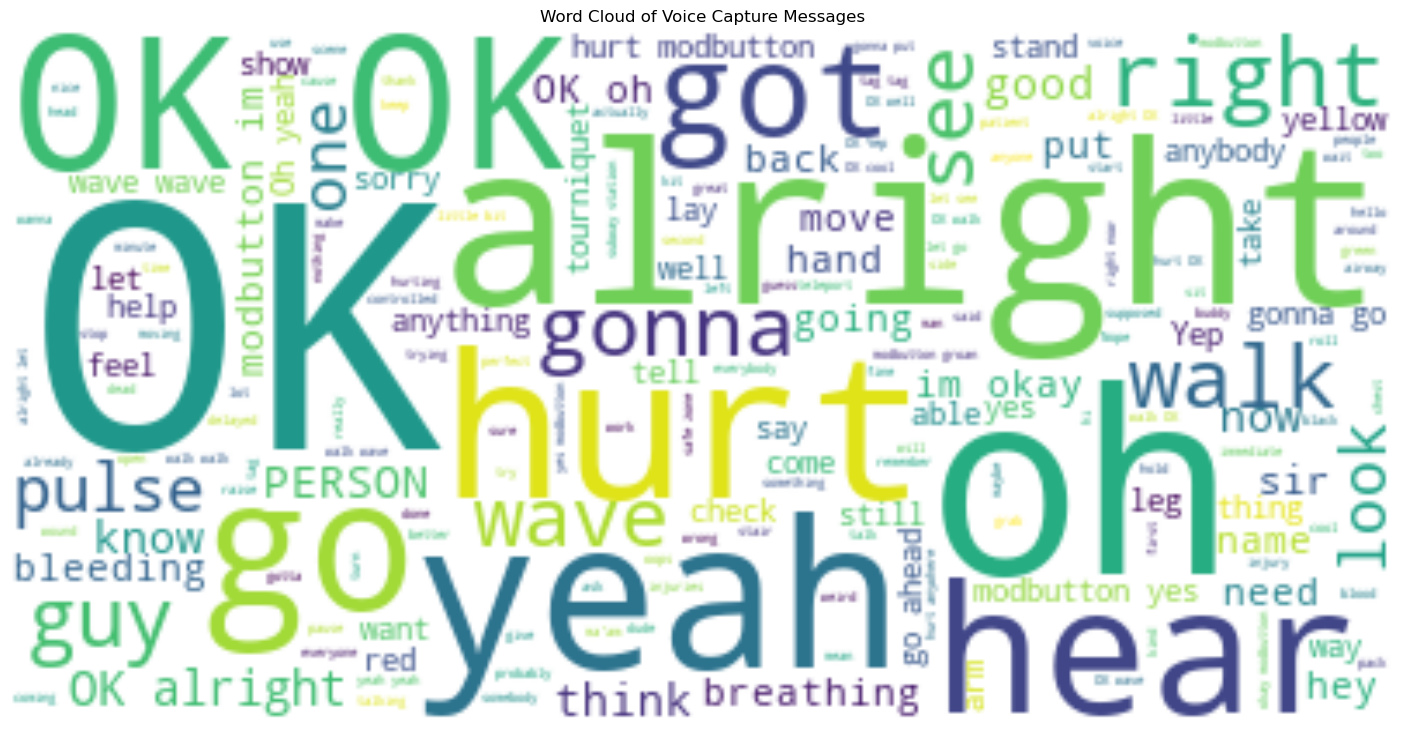

In [6]:

# Flatten the list of lists of words
mask_series = (frvrs_logs_df.action_type == 'VOICE_CAPTURE')
vcm_series = frvrs_logs_df[mask_series].voice_capture_message
vcm_series_list = vcm_series.tolist()
wordcloud_words = []
for voice_capture_words in vcm_series_list:
    wordcloud_words += voice_capture_words.split()

# Create a word cloud object
wordcloud = WordCloud(max_font_size=100, max_words=200, background_color='white').generate(' '.join(wordcloud_words))

# Plot the word cloud
plt.figure(figsize=(18, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Voice Capture Messages')
plt.show()

In [7]:

vcm_series.value_counts()

OK                                                   3143
are you hurt                                         1503
wave                                                  704
alright                                               683
modbutton no                                          557
                                                     ... 
he walked for me but still                              1
well i'll just say                                      1
alright go upstairs and see the ambulance drivers       1
my knees                                                1
Speech recognition working                              1
Name: voice_capture_message, Length: 19348, dtype: int64

In [17]:

def ultimate_tokenize(sentence):
    
    # Remove punctuation and digits
    sentence = sentence.translate(str.maketrans('', '', string.punctuation + string.digits))
    
    return word_tokenize(sentence.lower())

In [18]:

def show_corpus_stats(sents_list):
    sent_count = len(sents_list)
    
    # Calculate the average word length
    word_ave = np.mean([len(word) for sent in sents_list for word in sent])
    
    print(f'The voice capture corpus contains {sent_count:,} sentences with an average of {word_ave:0.2} words each.')

In [22]:

import nltk

nltk.download('punkt', download_dir='/home/dbabbitt/nltk_data')

[nltk_data] Downloading package punkt to /home/dbabbitt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:

voice_capture_tokens = [ultimate_tokenize(x) for x in vcm_series]
show_corpus_stats(voice_capture_tokens)

The voice capture corpus contains 34,224 sentences with an average of 3.7 words each.


In [ ]:

# Questionable command (“go over there”) issued
go_list = []
go_regex = re.compile(r'\bgo\b', re.IGNORECASE)
for voice_capture_words in vcm_series_list:
    if go_regex.search(voice_capture_words): go_list.append(voice_capture_words)
print(f'questionable_commands_list = {Series(go_list).value_counts().index.tolist()}')

In [ ]:

questionable_commands_list = [
    'go', 'go back', "let's go", 'go over there', "we're gonna go", "so we're gonna go with", "let's go over here", 'go there', 'can you go walk over there',
    'go here', 'go over here', 'Go', 'go this way', 'go to the', 'if you can walk please go to the stairs', 'go ahead and turn around',
    'so you know i would walk in see those four patients i would go and say if anybody can hear me i want you to WLK over here OK',
    'if you can walk go to a safe space over there', 'go that way', 'if you guys can walk go behind me',
    "we're gonna go over here we're gonna come over here", 'thank you just go ahead and sit along the steps',
    'can i go ahead and OK can i get anybody to walk move over here', 'oh can you go over there',
    'If you can hear my voice go to the safe area if you can hear my voice go to the safe area wave your arm if you can hear me',
    'go ahead and walk the safe zone if you can hear my voice go ahead and raise your hand', 'are you going to hear my voice go ahead and walk towards me',
    'go back to heaven', 'OK so if you can walk go to the safety zone',
    "so first thing you do is to do i like talk it through like you know the scene safe kind of things alright if you can hear me and you're safe" +
    " i want you to go to a safe area no one's getting up yep get up there we go",
    "him sit down on the step so that way he's not moving around sir can you go sit down on the", "yeah i'm not worried about you go over there",
    'wave oh you got a little wave there you go there you go alright', 'you go home',
    "I want you to walk over here they're preprogrammed to go to the stairs and and then the next thing is we wanna know who can follow commands we're" +
    " gonna say anyone could wave I want you to wave to me then you're gonna go to your unconscious patients first OK alright", 'no one more to go', 'alright go to your next one', "I'll go with you OK", 'out there we go', 'there you go all these people have pulses', "alright well I'm gonna go to the this guy down here under", 'ready to go', 'nobody can win oh there we go OK', 'OK if you can hear me stand up and go to the safe zone', 'go go to the safe zone things stand up', "what's going on that's glitching there we go", "let's just go ahead and", 'go and sort your page OK so am I gonna teleport over to there OK so I can', 'there there we go OK', "can walk walk over here so they're gonna go to their spot", 'So reach over there you go Yep and then', "oh OK now it's because I'm as soon as I push it and let go it does its thing right so I'm going there right", "that guy before right so I'd go to him first normally obviously", "so they're gonna go automatic OK", "so the first thing we're gonna do when we get in here is we wanna sort these patients so go ahead and use your sort commands to get these folks moving OK anybody that can walk walk to the stairs", 'more realistic as we go right', "Yeah so if we had life threatening hemorrhage that we saw as we were going to that patient we would stop take care of it and then go to that patient but in the program they want you to go straight to the unconscious yeah it's they're still you know like finessing this right yeah I get it", "get on that because they could be dead by the time we get back from that unconscious patient because once we go and get that bleeding stop we've given them more", 'and stop there we go [PERSON] is gonna start the full OK and you said like you said unconscious we walk over bleeding to go to the unconscious right in the program yeah yeah', "we're gonna get it there you go buddy", 'and sometimes fried like positioning like for you and the program is a little important to try to release it OK so it did go in and I', "definitely got a good pulse he's still going well now if the tourniquet works you're saying go to yellow even though that sounds really weird to me but that's alright we're gonna go yellow", "in the program we're gonna check OK so go ahead", "and put it put it to the there you go like right alright let's get more realistic OK", 'there you go OK alright', 'so I wanna go over to there', "holy **** oh sorry holy cow he's he's right here OK Yep I'm gonna take a step back OK so I could see him and I could see that he's got a patch on his chest he's got agonal respirations I can go check a pulse rate so to do that", 'what the heck there we go', 'there OK there we go', 'do i need to go farther into woo', "looks like your belly OK let's go ahead and put", "hey i don't wanna take me there there we go OK", "god this is cool alright let's go to here alright", "there you go good we're gonna", "so let's go ahead and pack it", "OK so when i'm checking for a pulse here or better yet let's go up here", "there's a half *** way there you go OK so i'm gonna teleport to whoops too far", 'alright so go and begin with these guys on my practice alright anybody can stand up and walk please stand up and walk and walk to the staircase on the right', "looks like he's still breathing not good good chest rise here you can have another one there you go", "OK so you've treated him he's unresponsive he's a red tag let's go ahead and move to the next next guy i'm gonna be him OK he said push forward on that", "don't you and every time it lights up yellow you can use your trigger finger to grab it and when you put it on a patient you let go it goes on the patient so now if you would like", 'go with', "well we're gonna go ahead and take care of the immediate nope", 'gonna go ahead and go with a black', "nope so we're gonna go", 'are you gonna go', 'does that go away', 'there you go now', "alright he is [PERSON] so we're gonna go ahead and yeah i'll get to you in a second", 'well there we go the red one there we go sorry about that OK and then pick that back up', "there we go yeah it's breathing got better", 'come here pack there we go', "so go back to that yep he's gonna be a yellow", "i'm not gonna go there", "OK go ahead and walk over to the safe zone wherever that's at", "so i'm am i ready to go OK alright", 'there we go whoo', "can i do i like cut his shirt off see what else under there just go with that that's it", "OK i'm gonna go to you", 'go to the sky again', 'alright you ready to go think so yep', 'make it go', "yeah i don't release OK there we go", 'there we go yep OK still rapid', "alright we're gonna go over here excuse me sir can you hear me", 'go straight into the scenario i knew the first four again', "let's go right here", 'oh my foot i think is on the way there we go', 'there you go is the bleeding stopped', 'there you go sorry my friend', 'they only go over there OK can anybody hear if you can hear me can you wave', 'where did it OK there we go', 'oh I gotta let it go to', 'go to The Walking', 'I wanna go on', "did that go on right I don't think so", 'so go to scatter right here', 'awesome so she can obey commands who is my other person go right here', "did he wave I didn't notice OK let's go to this guy", 'can I put what happens when I punch them go', 'I go through and explain', "and then let's try the teleport so use your right joystick and push it all the way forward and hold it alright and now you can move your arm around and you can kind of see the landing zone yeah it's green and I hit that trigger button and it let me go just let go of the", "hmm do I wanna go expectant I'm gonna go I'm gonna give him an expectant", "yeah I'm stepping over you somehow here I'm gonna switch that there we go", 'coral here put that on there we go OK and then you are immediate so here you go alright stay there', "and you'll see what it looks like when you put this on your wrist there we go", 'where did my bucket go', 'alright so so when you reach for it grab a hold of it and then let go', 'look up for me look up there we go', 'alright go stand over by the exit if you can hear me wave your hand wave your hand', "OK it doesn't wanna let it go", "alright let's take a look here well oh wait I wanna go to this guy", "fair alright let's go", "nobody's wearing oh OK got a lot of waves those that are waving at me I need you to go over here by the stairs", "there you go that's what I want you to do", 'so now I gotta go over to this guy', "some sort of head trauma at this point but he's walking and talking so he can go outside right now", 'I need you to go outside', 'if anybody can hear me go outside if you can stand up and walk I need you to go up either flight of stairs and wait outside', "waiting for help I would kind of go around and reassess people make sure there's no other oh I do see one that I couldn't see before", 'go to her', "I'm gonna go over and check him", 'go over and', "no that's right I wanna go here", 'go ahead and lay down for me', "hey where'd you go", 'go over there to the steps', "it didn't go in", "good radio pulses so I'd say he's in some some type of respiratory distress OK so that's gonna be one criteria now given the proper resources does this patient is this patient able likely to survive I would say yes so I'm gonna go ahead and put him as an immediate", "yeah Oh yeah it doesn't oh so at this time I'm going to go ahead and", 'find [PERSON] down while I go', 'go ahead and wave for me if you can', 'go ahead wait for me', 'oh oh God where did I go', "there you go well that's not where I want it but OK", 'you you need to go you sit the **** down', 'go one for you', 'I put a target on you would you turn it go did you take your target off', "OK we're gonna go with that", 'where did my kit go there it is', 'oh you need to go but', 'then go back over here', 'where do I keep bouncing to hey there we go', "I'm gonna go right there", 'OK so now go over to triage training on your on the left hand side of your computer', 'a lot of people will go fast and talk a lot of things through', "and they're good to go when they say they're good to go same procedure with the tutorial you'll do end triage", 'go over to you', 'can everybody go over here that can walk', "you need to go now so there's only one treatment so I can't do anything else for her what about you", "let's let's go for you", "oh let's go to this person first", 'when it turns yellow you pull the trigger and you go put it on their body', 'OK and then go ahead and move around this guy just so you get your bearings OK', "don't stay there until you walk away and then it'll go back OK", 'oh did that work there we go can you roll to your back to me', 'there you go go to the sky', "I'm gonna go expecting on you buddy I'm sorry turn around", 'go walk and stand next to them OK', "OK he's not gonna go anywhere", 'OK so we are going to go ahead', 'sweep sweep sweep sweep sweep no what are you you you need to go', "I mean you go immediate you're losing some blood no bleeding controlled I like delayed", 'alright go back to this guy', 'I gotta go I gotta go over here though [PERSON] over here dying I gotta go', "now we have a bit of bleeding there oh it's nice there we go I got I'll help you out for a second", "yeah I know what you got Yep you need some immediate help real quick with a tourniquet as well we shall control your hemorrhage hopefully that works for you you have a [PERSON] can't do much about that I'll talk to you later Sir why are you still standing can you sit down congratulations you do not pass go", "now we gotta get to these well it's gonna be hard to assess these major bleeding major bleeding you have arterial bleeding you're not really so let's go over to you first because you look really bad", 'alright do you want me to go back and reassess', "OK OK I'm gonna go ahead she's got an arterial bleed so I'm going to go ahead and try to get that a lot higher than I did right there um does that control it", "alright I'm gonna go back and check my people out", "I'm gonna go see what's up with this guy", "We're gonna go ahead and pack that", "I can't tell if that's blood that I'm seeing coming out of her abdomen or if that's OK so I'm going to go ahead", "he needs one packing I'm just gonna go ahead and pack that", "everyone who can hear my voice and can walk I want you to go over to those stairs and we'll be over to check on you", "I'm gonna make you a delayed you gotta go at some point for your hearing but other than that I'm done", 'I think I see a couple more people that I might have missed the first go', "go back OK let's go ahead", "I think everybody is tagged at this point I'll go back oops these", 'you can go outside', "then I'll go back over to these", 'OK then I need you to go outside', 'load here ready to go', 'there we go alright let me just oh hello', "alright let me put that on here oh yeah oh that's good we like that we like that that's good but went on it which didn't go far enough", 'looks like we got some polls tablet over here too sir oh what happened to my kid here we go grab another ticket and put it on', "uh we're no longer pulsat i'll so that's good high 5 sir OK and then let's we can go ahead and dress you up a little bit here with some guys to just then let me tag you here as i may be delayed and then", 'could check to see if your sweet nothings working there we go yeah', 'so you saw you saw you saw you i saw you i saw you i said you said you OK alright so i can go back and reevaluate', 'well that like let me do that there we go nice OK cool sounds good', 'there we go i can lay down', 'OK alrighty and then did that immediate tag actually go on him', 'there you go try again', 'what were the term could go', "let's go back to you", "alright we'll go ahead and search", "there's a safe area over there please go over there", 'go back to your algorithm', 'how do i tell them tell them to just go to the like safe area', "dad immediate immediate treated OK i think i've treated all the reds and now i'm gonna go and go to the next group of people", 'OK awesome and then i was gonna put this tag on here we go OK uhm', "if i go too far i can't it's like", "oh it's 'cause i OK if i do this oh there we go", 'if i just put the yellow on will make the red go away', 'hey go back to the sky over here', 'i know there go', "yeah i still don't i'm gonna go right here and then yeah", 'go ahead and wave to me if you need help', 'i go by the polls', "yeah i put immediate then alright so then i should go back to that first person then right 'cause i didn't tag them", 'go over this person', "everybody gets everybody gets a treatment if they need it and everybody gets attacked so he's done so go ahead and teleport to the gentleman in the green", 'go if you', 'sir you wanna move it all these guys go', 'go home', "can we just go ahead and address everyone like while i'm doing this oh OK i didn't know if we had to tag everyone first", 'you gotta go through', "let's go check on these people real quick", "OK i'll be right back i gotta go help some other people", "let's go this lady next", "he's talking so he's fine let's go over there that needs a turnock it", "there we go i mean inflated him so he's definitely immediate i was good", "OK hi if you can hear me can you please go over to the stairs you're able to walk can you please move to the stairs", 'uhm go and put red tags on and', 'so with assist oh there we go', "that's the only place you could go so", 'did that go on', 'all right everyone who can walk please go over to the stairs', 'there we go we can bring down here to another ternative for you sir', "don't give you a delayed tag you go over here", "that's around where we go OK", 'oh boy here we go', "no i'm gonna go there", "alright I'm gonna go to him he's spurting blood hey there wave at me buddy", "I'm gonna go over to this person", "you guys hurt go upstairs if you're hurt", '[PERSON] atonia chest if so go next person', "I'm gonna try to do that maybe go around that won't do nothing", 'go to the exit', 'hey can you move go upstairs', "go to rapid pulse so he's got some chest trauma", "laying stills so we're gonna go here", "OK 12345 OK so I'm gonna go to my", "I'm by myself but if my help is here and I treated my immediate life threats so my red needs to go first and my yellows and creepy guy can just follow me or keep breathing down my neck whatever he's doing", 'there you go OK who else', 'OK well we will go with', 'oh did it go', "OK i'll go on to the next person", "i'll go ahead and", 'we can move can you leave and go up the stairs', 'OK i would go start seeing people again', "that should heal overtime but i'd like you to go to the", "so i'm gonna go to the first person that didn't wave at me", "all right everybody if you're able to walk go over there", 'where do you go', 'going back just go back go back', "OK we're gonna go to the first person first", "just gonna go right there i'll get i'll get back to you guys in one second", "OK i see OK so will try again so this is the toggle so go over there yes gary OK gary i'm gonna feel your pulse", 'go to this person', "will go to the people who are not i'll be there with you in a few minutes", 'OK go away', 'OK turnock it boom bandage bandage boom OK did the turnock it go no', 'OK go right there', 'OK put this away kit oh OK go away alright who else is not responsive this man', 'oh there we go no look the air came back OK you need immediate help brother', "OK now all right i move let's go right there alright stay over there", 'oh OK do I have to I have to go grab a new one again', 'or start the full scenario OK so come over this way a little bit there you go perfect stand right there', "alright yeah obviously we gotta pulse Oh no wait I'm gonna go it's bleeding stop", 'so go here', 'and then put it to the side of him and then let go and look down your feet OK', 'why can I not go here', 'go over there can anybody raise their hand', 'oh right right right yeah not tourniquet OK go on', 'hey go away', 'if you can walk go that way or that way can anybody wave', 'yeah OK there you go', 'just go red here OK', "OK alright [PERSON] I'm gonna go", 'there they go', 'OK so go to this one first', 'nothing go away', "OK so I got two unconscious I'll go to them", "you're good to go", "I'll screw it I'll just go right here then", 'wanna go on the other side of her', "Nope you won't even do that I was just I'm trying to point like you can see me alright he's done he's done let's go right here", "alright moving on let's go", 'Good to go', 'alright trying to get my kit here there we go', 'alright go ahead and have a seat by the stairs for me', "OK there we go what's that", 'if you can wave your arm go ahead and wave', "it doesn't work oh there we go", "alright you're good to go", 'there you go fella', 'alright move your hand there we go look at that', 'go away', 'oh he needs A tag where do you go', 'there you go OK do we have a', "chest OK let's see wait there we go", 'I think that ship might be in your way oh so go ahead and grab a black case', 'there we go and', "yeah have him let's go over here real quick", "alright I'm tired I'm tired alright let's go over think I got him talked already right", 'OK so go write a little bit OK', 'there you go check your pulse', "where do you go oh jeez you're close", "where's this hand alright there we go yeah", "doesn't matter how far I go", 'alright let me just go to this guy first Nope trigger', 'oh that there we go alright no other injuries right', 'look at this one yeah here we go', 'OK go ahead and roll on your back if you can for me alright', "OK so let's go here to this lady", "he's dead that [PERSON] waves so we're gonna go here check a pulse", "OK this fella didn't wave to me so let's go here", "let's go here", "so fast let's go he would be a yellow right oh wait he's a red because it's a chest", 'this fella oh wait we go to unconscious', "she's gonna go and start the tutorial for you so first thing you want to do in the tutorial is sort your patience OK and so you're gonna use those two those two sort of commands so go ahead and start just let me know anybody who can walk get up and walk towards the stairs", "can I have you just go over to our collection point and somebody will be there actually you can just go on to the ER or go home or do whatever you need to do right now but I'm gonna have you leave this area please OK for your safety", 'put a different tag on you OK there you go', "so we'll give her a red did that guy did that guy did her let's go to this guy", "OK walk that way and go to the collection point somebody will be there to help you OK what's that", "you too you look like you're doing pretty good I'm gonna have you go over to our collection point will there be more people there to help you OK", "OK buddy I want you to go ahead and go over to the collection point that we have there'll be more people over there to help", 'I want you to stand up and go to the collection', 'Sir go ahead and sit down you go ahead and sit down', 'and there we go', "so this is your scenario you've been dispatched to report of an explosion at a subway station you're the first on scene you're the only resource there and help us 15 minutes away oh gosh OK alright if anyone can hear sound my voice stand up and go to the right or the stairs", 'sure the most serious go to him right here OK so', 'just go here', "got it got it got it got it got it got it got it let's go see what this dudes doing because he's just kind", 'there we go OK alright any trouble breathing', 'there you go a little lower', "go ahead and hit your toggle oh that's that", "alright so we're good let's go over to this guy since he's got", 'oh there we go OK and then just let go', "oh crap oh I'm already over here alright sorry if anybody can wave their hand go ahead and wave at me real quick", 'OK go over this guy', 'so go ahead and tag them black', "alright so we'll go over here to the other", 'you just go through do what you think is right OK', 'so go ahead and reach out and grab that needle when it turns yellow perfect put it where you think it needs to go [PERSON] couple wisdom', "so let's go back to this walking wounded over here", 'there you go you can put that wherever you want to put it above your head you can put it on the ground oh', 'so go ahead and grab it again', "he's in pain he's in too much pain I can guess where it hurts you go bud", 'through and you go and like', 'oh I see I see I see OK there we go I was dropping', 'Am I good to go', "There we go you're green", "let's go see this one", "let's go and set that there", "we'll go here", 'OK so everyone can hear me sound my voice stand up and go to the right', 'go to pulse', "alright let's go here", 'she go trying to get that one real quick', 'I thought I was doing all there you go forward forward not down gotcha', "oh go here just walk up to it'll be easier", 'what are the four go', "and yeah we're going red boot I can't see what's going on in here there we go", 'go to pulse so I just checked it', 'go ahead', 'I can go past him now right', 'yeah this is like yeah what did that do go', "I'll go back and come all the way up", "let's go who can wave", 'go to the next guy', 'alright go ahead and sit down', 'Make it go away', 'Alright So what I do just grab this or just go to the next one oh sorry', "oh I can't go there", "OK so here is can I walk a little bit I don't wanna OK go facial trauma you have a pulse", "let's go check this guy out now", 'alright good you guys go over there', 'so at this point I just go to', 'if I move does the trash kit go away', 'how do I let that go OK', "well he has a lot of bleeding I mean it looks like some significant burns my bad I'm sorry so I'm gonna go ahead and tag him and get him situated I forgot to do the same for this gentleman over here let me go ahead and get him situated", 'alright let me go over to this gentleman over here', "OK alright I'm gonna go check these other guys out OK", 'there you go OK take some deep breaths for me', 'and then you let go', 'you can go right there', 'Just let it go yeah', "so I'm gonna go to this", 'find my red there we go', "so let's go to", "so I'm gonna go", "I have no clue which way to go at this point at this point I got no idea where I'm at in here", 'confident that you can go with yellow', 'sit down sit down there we go', 'oh **** where to go', 'where did the thing go', "I'm gonna go straight", "Oh yeah so we're gonna go over here to the one who's missing a leg", 'where can I go a little closer', 'where we at here anybody can stand up walk go and walk over here', "here we go where's that", "oh OK he's gotta go OK he's still going", 'and then I gotta go over those dudes sorry I gotta go this guy', "gotcha so I'm just gonna go to him first", 'do I tell him to go to a', 'there we go yellow right', 'and then go right side', 'now go to my waiver', "I'll get the hang of this here we go", 'go over here please', "alright we're gonna go alright we're just gonna go like that", 'then go to the next guy', "no you can't go home that late", "let's go delay your breathing", 'there you go Oh no wrong one sorry sorry', "let's go over there", "that'd be real life they would go unresponsive first", "alright it's sunglasses there you go", "hey let's go you", "what's up anybody that can walk go to the safe zone", "Nope alright we're gonna go with the", 'OK can you go ahead and walk', 'wait hold on there we go', 'anybody that can walk please could go ahead and walk away', "there you go we're gonna throw you in yeah", "so they didn't go back up", 'where does it go on the other side', 'anybody that can walk go ahead and walk out OK', "man that's just I'm gonna make her immediate sorry bro I know you you probably said I could do something else to her Sir why don't you go sit over there on the stairs", "so should I go do some treatment OK let's do some treatment shift tourniquet", "good post so why don't you go sit down OK", "yeah we'll go alright", 'good anybody that can walk go to the safe area', "we'll just go ahead and do this just for safety", 'oh here you go', "oh it didn't go", "now we're gonna go over there to that girl", "alright let's go over there", "I can't go over there", "I'm gonna go over that guy first", 'what is go this', 'go a little bit further out', "I can't go oh there we go", "OK then I'm gonna go yellow OK", 'go to the most serious patient', 'so with this guy go ahead and kneel down check his balls', "so these patients go to a preprogrammed area so don't go and go home", 'if you can walk please get up and go to the stairs for me', "and then there's your patient so go ahead and sort these patients out for me OK", 'just go and see if you can adjust it on your face just a little bit usually if you push it up', "I think it's this guy there we go", 'try slowing down just there there you go', "and so on that Yep there you go that's God's just", 'Yep there you go', 'here we go yeah I think so', 'do I go into this thing oh ****', "alright so let's go", 'no there we go Yep OK', "so we're gonna go", 'there we go so', "oh God I don't know which way to go here", "there pulls and we're gonna go", 'good alright and then we will go', 'so if you go', 'there you go so these are your four patients so the first thing you wanna do is sort these patients out OK', 'go ahead and turn around and teleport to the will that automatically go back OK', "OK we'll give you both here you go", "go ahead and make it you might die on this one you gotta pause you're good", "we're gonna put another one up here there you go damn where's your like do you know", 'there you go see ya', 'what else we gotta go', "Oh no that's a black go", 'there you go have a good day', 'oh I gotta go up those', 'yellow oh green there you go bracelet', "yeah yeah we'll just go ahead", 'so there you go when it turns yellow there we go', 'there we go oh I got like that', 'yeah I love it there you go OK', 'wave to me go ahead and sit down on the ground thank you thank you', "we're gonna go yellow", "I'll go with you", "it's not letting me go there", "alright they won't do that OK alright and then in this scenario we want to go to go past all the ones that so this guys first", "alright just remember [PERSON] you can go and you can talk to these patients you can ask questions OK tell them to reposition hmm so just remember that sometimes that's helpful to use in the program and if you're ready [PERSON] will go and start the full scenario perfect any questions I don't think so", 'wait there we go', 'oh there you go OK cool so', "alright I gotta go I was gonna put I was gonna put a green on her that's all I see is yellow yellow OK", 'there we go Yep', 'there you go perfect alright so that and that', "we'll go I'll give you one of those too why not", "let's go oh let's get to this cat", 'so I can go here', 'See if I can go here alright cool pass', "there we go alright waivers waivers waivers OK so I'll start", 'I wanna go back', 'there you go got that', "we're gonna go [PERSON] for this guy", 'and then go back to my other guy', "it is accurate so OK so we're gonna go oops", "we're still gonna go", "but I mean when I go to reach for it it's always here", "so we're gonna go it's still even though it left it wants to I gotta reach to my right to grab this", 'this is I wanna go to the closest person so I wanna go to my unresponsive people and tag them is that the', "you're wasting resources on them and so you put them as a Gray and it's like people aren't gonna go immediately to them because there's nothing we can do for them OK OK so [PERSON] is gonna start this", 'do I have it no there we go', 'I did I did a pulse you had a pulse so does this just go away do I have to do anything with my bag', 'OK is this everyone or is this my practice go', 'Oh my grab my crotch area come here stop moving there we go', "let's go ahead and take like 5 steps back", 'now go to your', 'Here you go', 'I need you to go over here Sir and sit down for me please', 'there you go and then just release it when you want to use it so go to the right side', 'did you go in', 'OK here you go domino lag what the', 'remember when you go in the first scenario', 'there you go now try to put that', "there you go it's like every time he moves his gaze goes away", "OK let's go to polls", 'so go ahead and put the remote on 1st', 'so go ahead and say if anybody can walk up there dinner already', 'and then thumbs are gonna go here', "alright we'll go over to your last", 'OK there you go and then we need the gas here', 'there you go move it', 'so go straight straight back', 'there you go keep going', 'so go ahead and build yourself back a little bit', "OK I'm gonna go ahead and", 'there you go sorry for the hiccups no go save somebody', 'go ahead and kill this pulses pulses radial pulse', "and that would be that and then I just wanna make sure it said he's got good peripheral pulses so we're good to go", "if it's green you can go there so you can move it around now move it by the guy that's unresponsive", "this is your mover this is your mover OK if you push the joystick forward with your right thumb you're gonna see a green beam of light OK it's red because you can't go there put it on the ground", 'start with your global sort so if you can hear my voice I want you to walk to the safe area go ahead and say', 'and I just go to whoever', "bosses so let's go yellow tag", 'OK and let go OK', 'I let go of it I guess', 'did I just let go and it goes in OK', "so this time you've already seen those two but go ahead and go back to that guy", 'so go ahead and walk', 'there we go OK hi Sir can you wave your hands for me', 'And let go', 'go to the left thumb OK', "OK I'm gonna go to him", 'go and wave again', 'This thing is there you go', 'if you can wave go ahead and wave', 'yeah go ahead and', 'OK and then let go you should be at his feet', 'use your right hand go ahead and put it into his chest there you go', 'alright cool you go ahead and just let the', 'I go there we go', 'go ahead and put it in this text', 'if you can hear my voice go to the safe area', "that's where you go oh OK that's cool", 'where do you go there he is', 'oh that worked did it not go in there', 'alright we just pick and go right', 'so go over there in the corner done', 'there we go yeah behind me', "just white thing oh there it is I just let go and I'll stay in front of me", 'go ahead and pack it', 'got waivers how do I do this teleport thing oh there we go', 'thank you thank you to my right there you go over by the stairwell please', 'I guess I can go do a once over make sure I tagged everybody', "I'll go over here", 'I will go back and tag him', "No other wounds that I can see so we're gonna go with the", 'Go to start', 'and then the other guy and so check his pulse go ahead and take the carotid pulse', 'oh where did it go', "So what you're gonna do is I should have told you the patient respond to verbal commands so the first thing you wanna do and salt is you wanna sort the patients out so we want to get people to move out of the way so go ahead and tell them what you would tell them to get out of the way hey who can walk", 'there we go check boss', "I'm gonna go yellow", 'where you go', 'sit down OK oh I see it there we go', 'alright so go over here', 'OK I just go', 'alright good job go ahead and let your remote and you take the headset off', "alright let's go over here and check these guys out hey what's going on", "alright let's go let's go to you", "alright I'm gonna go to this guy first because he's down", "racing against time so somebody's talking to us we're probably gonna go and be like yeah you've got a false OK", 'alright anybody that can walk get up and go over there', 'so go ahead and start with your commands if you can walk move to the stairs please', "so in the tutorial first thing you wanna do is sort your patients out OK and so get your walkers out of the way find out who can follow commands and then we're gonna go to that unconscious patient first", "let's go false", "there you go alright I'm still good with red", 'I go', "alright we're gonna go with", "go with that's black", 'go walk away oh **** that one real', "let's go with this guy where is it", 'Gotta go around', 'There you go OK', 'there there we go', "that headset you want that oh there we go OK that's better", 'just let it go', 'you go there', 'hold on let it go', 'let go', 'just stay there there you go', "OK we'll go ahead and put tracking on that", 'You go over there and walk OK alright', 'OK alright you gotta pause pause got multiple stuff going on here gotta go and clean this up', "can you wave there we go OK no I don't walk OK so", "oh OK and then we're gonna go ahead and make him a red", "yeah I got I got pause and he's breathing I'm gonna go take a precious guy", "OK anybody that can walk please walk towards me come back here by the stairs up against the wall good anyway I can hear and can wave please wave wave at me good OK alright I'm gonna go and start", "oh the laceration OK Yep OK we're gonna go ahead and get you take care of here get this thing wrapped up for you alright good and you might need some stitches so we'll make you a a yellow no", "because he's gotta go straight to the ER alright we'll take care of you OK buddy oh that's fellow here yeah", "I don't wanna pack that up he's got good rapid pulse here so we're good to go and I'm gonna make him an orange", "oh and as I'm doing that and I'm gonna go ahead and pack", 'Yep nice and wrapping good to go', "it'll go", 'just gonna go ahead and', 'Here we go OK', "OK so i'll go to", "can't go there move it towards the floor and then let go whenever the circle is where you wanna be you wanna be by the end the guy on the end OK like right there yeah OK", "OK great alright so he's ready he gets the yellow tag and then i'm gonna go see the other patient", "alright i'll go to this guy because he sees more injured OK oh no he's bleeding OK", "no OK great and then we'll go to our next patient", "alright we'll go to", 'OK can i see no obvious bleeding but since he is unconscious with my pet go', "OK we'll go to this one", 'go to this file first', 'OK ready to go', "alright i'm gonna go over there", "other moving OK this fast forwarding so i'm gonna go to this guy which i'm gonna teleport so i'm going to click don't click oh push push forward oh that's right sorry there we go OK", 'thank you kind of like picking up where you left off so once you sort your people will go to the third guy OK', "yeah we'll we'll finish the tutorial we'll skip the nemo thorax and go to the next one", 'why is there a there we go OK', "good OK i'm gonna go to my next person which you said glide", 'go to the safe zone over there', "if you can hear me and you're able to walk i need you to go up the stairs and evacuate", "there you go that's good that's", "alright and then i'm gonna go here hey sir what's your injury", "sorry it was pushed forward let's go that way", "he's got a lot of wounds so there we go", 'alright there we go cool', 'so remember when you go in there you wanna use those sorting commands those first two so go ahead and give your first one if anyone can walk walk over there', 'there we go oh wrong leg', "i'm gonna go ahead", "i'm gonna go ahead and", 'go ahead and give her', "let's go ahead and", 'go is there any way to type OK just OK cool alright', "that's sad yeah there we go OK your legs hurt oh OK", "oh no i can't see it there we go", 'OK and then let go', "OK he's not bleeding anymore alright let's go", 'alright you can hear my voice go ahead and walk over to the stairs over here', "it's not letting me go", 'oh this guy how do i get him to go over there', 'pressure dressing there we go', "but bleeding looks controlled now i'll go with minimal i'll put it on that wrist", "i'm not gonna go over here", "gotcha i'll go lower than that space OK", 'let me see that can you let go', 'there we go alright do you have any other injuries', "OK oh do you wanna practice that first OK OK i'm gonna go right there", 'gonna go towards you', 'OK OK i see the unconscious people so i go to them first right', "yeah i'll put that will go away", 'here you go hun', "i'm coming sir there you go", 'oh there we go like that OK cool and then this comes with me', "there OK there we go now it's now it's even", "actually hold on i'm sorry there we go", "guess we'll go with neil decompression", 'girls like do i can just go ahead and do the thing i will do this thing', 'just put it on his wrist drop it yeah there you go', "and then i'm gonna go to you sir", 'alright right there we go', 'alright hi everyone whoever can walk could you go to the safe zone please', 'oh no alright there you go', 'i mean the wall OK there you go oh but OK OK', 'there you go release OK', 'there you go OK tourniquet', 'bring it a little bit in front of him OK there you go right there is good OK OK', "he didn't wave so i'm gonna go over to him", "OK immediate you're gonna go in a little bit OK um let's go over to let's the leg over here looks a little funky", "oh OK we're gonna go to you since you're closest hi sir OK we got two things going on here", "we'll go to you sir", "if that was an abdomen wound and you can't tell whether there's internal bleeding that would go red", 'here you go drop it', 'alright if you go to the safe zone please do so', "yeah i tried to put him in it didn't go", 'there we go that feels good down', "let's go to the next unconscious person over there", "check let's go to next person here", "OK got it let's go this guy here", "don't let those go for a second and then go ahead and put that on you don't let these go yep", "education OK let's see let's go to this guy next", "i didn't go through a triaging", "OK i'm gonna go to this guy here oops i'm sorry i'm gonna go to this gentleman i'm sorry i was right behind me OK", "OK got it so this helps me to go where i want somewhere i don't wanna go in the subway", "man i'm gonna say you're delayed because you need to go", "i don't have enough room forward or need to go again", "i don't want him to go home", "but that doesn't mean go home so he needs", 'oh go to this guy', "thing you're gonna do is you're gonna go and use your sort commands so if anyone can walk walk over here right go ahead and walk over towards the stairs", 'so remember you can tell him to sit down go ahead and sit down', 'oh I guess this one that looks like my best guess here there you go oh oh did I do it wrong', 'go ahead and release that gauze keep backing up a little bit there you go teleport to that guy', 'you think it needs to go', "OK so let's go to polls", 'before you release there you go', 'alright go here first', "so then the next thing is we wanna know who's so we're gonna go we're gonna say", 'here we go Oh yeah so much more better', 'and getting our green walking out of the way so [PERSON] go ahead and say if you can walk over the stairs', 'so we wanna go', 'there you go Yep', 'so go ahead and check', 'alright what do I got here oh I got that one there you go', 'where to go no no come back up here', 'go to this one', 'characters go you can ask them questions you can', 'oh you look alright go to this guy first', 'and then go to the guy in the green shirt', 'OK so go down to this', 'this impact Dallas around it there we go', 'OK and then go back does that make sense', 'and so just kind of walk in front of him a little bit there you go now', "there you go OK that's all good so", 'go ahead and grab the other one and stick that', 'go ahead and grab the start', 'go ahead and look at your tools', 'freaking understand me there you go', 'there you go walking in the wall', 'where my kid go the back on my side again oh OK So what you do something open your kid again', "alright let's just go ahead and", 'alright actually wanna go', 'OK so I wanna go to', 'There we go yeah', 'yeah go away OK', 'OK oh there we go oh', 'do I have my kit go', 'computer program go to your unconscious patients first OK', 'go to start', 'OK 123 go', "here we go check his pulse good make this guy red don't see any other injuries", 'so it wants you to go to the unconscious patient first OK', "how come there's not go higher than that", 'so go ahead and kneel down next to him check', "turn it on you and put mediate on yeah I'm yeah I'm gonna put me on you since you have done well so I'm gonna be right to you I'm gonna go over to", "you're awesome so then go to your walkers", 'do I just let go right here', 'missed you there we go do I need to keep going or is this the one good', 'OK so do I have to do vitals first or can I go ahead and treat this', "I'm gonna go to my walking wound is here since you're all good", 'oh shoot there we go', "OK I'm gonna go over to you I'm not doing that yeah I'm doing that", 'anybody wave OK gotta go to you', "I'm gonna go here I'm gonna put I'm gonna put this on here first alright I'm gonna go tourniquet", 'how do I do it again oh there we go boom', "I'm gonna go here first", "I'm gonna go over to in real life I would go to her and I would put a tourniquet on her immediately um", "I'm gonna go over here for right now", "yeah yeah there you go alright we're gonna go ahead and do this we're gonna check a pulse OK you got a good pulse we're gonna wrap you", "here we go grab this out here I'm listening your lung sounds OK alright cool we're gonna take this guy I'm gonna patch you up", "girl you first he may be a distractor but oh there we go Oh no he's not OK you're still standing awesome you can sit down if you want", 'I wanna go over to', "oh you're alright we'll get you all fixed up here I'm gonna get my kit here handy [PERSON] what do they call it handy dandy notebook there we go a little Blues clues for you here we go put this over here for you", 'fixes it so go ahead and check the box', 'hey go buddy oh', "so now you're gonna go to", 'so now I go to this guy', 'Oh no go all the way down OK', 'oh there we go oh', "right and we're gonna go", "where's my kit oh down there there we go", 'there you go and you can roll backwards', 'there you go please oh hello', 'if you can stand and walk go over to the stairs', 'OK I go to this guy first', 'am I there you go', 'alright go ahead and let your remote [PERSON] and then take the headset off', 'and then go ahead and wait for me if you can wave', 'no go ahead and walk over there', 'go to', "alright so we're gonna go", 'two nice if you can wave go ahead and wave your hand', 'alright if you can walk go ahead and walk over to these stairs', 'if anyone can walk go ahead and walk over to the stairs', 'so put that where you think it needs to go on his chest', "go to still bleeding so i'm gonna turn to kick her", "you're gonna say anybody can walk I want you to get up and walk to the stairs have been making walk get up and go to the stairs", 'anybody can walk go to the stairs', "we're gonna go with yellow", "first thing you do is sort of patience you're gonna go and say", "uh we're gonna go over to this guy because he's not moving", "OK so we're gonna go", "don't feel like you need to go and expose you know things like that and then remember you've got a gray tag insult so it's that expected tag right yeah", 'go to media', 'OK so i wanna go that way alright', 'go that way bud will you yeah he did come over to me', "so there's your patience so go ahead and start sorting out", 'i would want there we go', 'makes sense sure that sounds alright cool so doug is gonna start the tutorial for you and so go ahead and physically turn around', "if you're going and you're walking to an unconscious patient and you see somebody that has their leg amputated and they're bleeding out you're gonna stop and put a tourniquet on them and say hey i'll be right back and then you're gonna go and continue on to that unconscious patient but in the program it's more black and white than that so don't don't worry about like having to jump over to another", 'so go for the the gauze roll for him the gauze roll', 'yeah OK there we go', 'so go and push your laptop switch forward', 'so go ahead and teleport over to your walkers', 'so go ahead go ahead and teleport to the guy in the green shirt', 'then you can go and continue your sort process by saying anyone who can hear me i want you to wave and then that shows you which patients can follow commands', "so anybody can walk walk over here like he's doing and then you're gonna go and you're gonna say if anybody can hear me i want you to win and that's gonna tell you who can follow commands and OK in the program", "participation in real life if you're going to that unconscious patient and you see someone who has their life blown off you're gonna stop at that person and put a tourniquet on it sure and then say i'll be back and move on go to the unconscious right but in this it's more black and white so don't worry about that sort of thing", "let's go on i already did that guy let's go over", 'and then i go back down to him', 'OK so now do we go revisit or OK', "let's try this here we go alright", 'you wanna go down to this', "i'll let it go", 'go into four patient scenario', "OK so let's go to this person first", "he doesn't need to go first", 'do i let go or OK oh very nice OK', "go back to [PERSON] is where we're gonna start OK she's gonna start", "so [PERSON]'s gonna go and put you in the toilet", 'try again go 45 degrees between his neck', "OK so we're gonna go here", 'OK go over that guy', 'so should i go ahead and start if you can hear me go walk to the safe zone', 'he needs to go', 'OK if you can hear me and you can walk go to the safe zone', "if they can follow also OK so i if i command them to go stand in the safe zone they're gonna stay on the safe side", 'right OK if you can hear me go ahead and walk to the stairway', 'and then you go', "and the controls and then have you practice the the salt triage process so the first thing in salt with that stands for is sort so we're gonna go and we're gonna say if anybody can walk i want you to walk over here and your patients are gonna get up and they're gonna go over to the stairs because that's where their program to go once they're up and moving", 'because i want you to go and use that teleport to go over that unconscious patient to your left', 'cool go ahead and start', 'go ahead and turn around to [PERSON]', 'did you go', "there you go i'm sorry", 'till i go now', 'so push that forward there you go oh hello', 'to go on the right', 'so in the program just go to the unconscious patient', 'go ahead and', "if anybody can walk i want you to walk over here and then once your walkers are out of the way then you're gonna go and say if anyone can wave i want you to wave and then you're gonna know who your patients are that can't follow commands OK if in real life if you come up to somebody that had a complete amputation", 'and then go and say you can hear me', 'OK and then go ahead and teleport to the guy in the green shirt', 'go ahead and drop your notes', "OK so he's a red and i don't see anything else wrong with him so i won't go over here", 'go up there', 'the tree that life threat with them and you stop that from you can actually be a delayed instead of a red OK so i go with this guy', "and then notice like you don't hear his respirations anymore so go ahead and tag this OK", 'alright so go ahead and teleport to the guy that is unconscious', "you use your your global sort commands and then then you'll teleport so go ahead and do that WAVE command OK everybody can hear me wave", 'there you go hola amigo', 'go on to your next guy these guys were the ones that were walking', "four patient tutorial and we're gonna teach you how to move with the remote and then we're also gonna have you go through like the salt triage process OK which starts with those OK", "that's kind of a nice way to get closer so he has no pulse and some agonal respiration here so we're gonna go expecting on him", "tag tag tag tag tag don't go forward i appreciate that", 'go ahead give me', 'can i go to this guy or do i have to teleport over here', "i'm gonna go meet it on you you're missing an extremity", 'works where you go immediate cause she might have internal bleeding', "got more important things OK let me see i'm gonna go right here can you hear me how are you", "anybody that can hear me wave OK we're gonna go", "OK then i'm gonna go", 'just go ahead and grab this', 'wanna go to your unresponsive patients first', 'you know a lot of people go and say well', "so we're gonna go here", "OK i'm gonna go to this guy OK yeah", "i'm gonna go to this", "it's got some rupture eardrums there or up the stairs you go we don't know like casualty collection point there's more folks over here", 'i gotta move my here we go', "OK alright there alright we're gonna go anywhere else", "WA oh you i'm ready to go OK sorry yeah so i can just talk to them alright if you can hear me go ahead and stand up and walk over to my right", 'OK so nobody can walk if you can hear me go ahead', 'oh OK there we go', 'do i have to do anything to get to him oh my goodness there we go', "there we go any other injuries you've got one there", "got him get you in a second got you let's go over to you next", "here you go man i'm here to help", "did i give you a take i did give you a tag i'm gonna go to him", "OK who's next i'm gonna go to you i'm gonna get dizzy doing this but that's OK", "who's next who's next i need to go to you", "where do you go there he is i'm over here now so there been down alright so you where's my stuff i need this", 'if you can stand and walk please go over to a bench', "alright everyone i'm here to help anyone who can stand up and walk please go to the wall", "of how much trouble you're having there you go OK", 'go over to a wall', 'anyone who can stand and get up please go over to a bench', "there we go what's going on with his leg is that just from his arm", 'bring it down there we go', "they'll come with me cool i'm gonna go to you", "cool we're gonna take this there we go you need that alright sir hello are you with me", "here we go i don't know why i'm dealing down where is my turn", "oh there we go right here right there we're sort of this guy", "OK who's next i need to go to you", "hey there we go now they're moving anyone who can hear me but can't get up and walk please raise your hand", 'and use the arrow to go where i wanna go', 'OK go', "that's OK so gotta go over there", "we'll get this started you have been dispatched to a report of an explosion at the local subway station and you are the first on scene you're the only resource there and help is 15 minutes away well nice OK alright i can go ahead and get started then", "OK let's just go for", "OK i'm gonna go here", 'OK and if you can hear me go ahead and raise your hand and wave it put it in the air OK perfect thank you', 'go ahead and raise your hand and wave at me', 'go ahead and teleport OK', "see how it's red yeah say you wanna go right", "OK i'm gonna go", 'there they go OK three of them can', 'yeah there we go OK', 'now there we go', 'alright so now you see your unconscious patient so go ahead and teleport oh no oh there we go', "there we go OK it's probably", 'alright if you can walk please go over there', 'OK go ahead', "i'm gonna go back and talk with derek", "OK so he's got is the red on good to go OK", 'go for it jess', "we don't know if they're green yet OK we got some walkers if you can hear me go ahead and wave to me", 'he could go home this', "i'm gonna go", 'OK cool alright and then that guy already done OK so i go to this guy', "OK alright i'm gonna go ahead and get a tourniquet on you here", "bleeding there obviously yes OK i'm gonna go ahead and put a tourniquet on you OK stop get this bleeding stopped", "got that bleeding stopped so i'm gonna go ahead and we'll get some help to you soon OK yellow tag", "so i can just go into this one hi ma'am where are you having pain are you breathing OK OK she's got", 'i see this one here is not waving wrong wrong thing here we go teleport to this one OK sir can you hear me', 'OK there we go OK', "there we go OK hello sir OK he's got bleeding right there everything's OK so i need my", 'so push it in there you go', 'there we go and then', 'this person there we go', 'oh OK so if i go like that OK', 'can you go right after or can anybody wave to me', 'they will go and say', "this is where you're gonna go", 'can i swear just gonna go for it full send', "OK and then i'm gonna go over to my other guy", "not super urgent friend alright i'm gonna probably go", "i'm gonna go to this person", "and i'll go to you hello i can see that", 'alright there you go sir any other injuries you got a little blood everywhere', "go ahead and put it in the anterior i see what you're doing OHP OK", "so don't worry about directing them and then after they start moving then you're gonna go and say if anyone else can hear me i want you to wait and that is gonna show you your patients who can't follow commands OK those are the patients you're gonna start there's like a teal line here", 'go ahead and let go of your notes and take the headset off', "so i'm gonna go", 'OK OK here we go alright i will be right with you sir', "there we go i'm gonna call you minhall cause that looks pretty well controlled", "and i'll just go OK there we go", "i'm gonna go with hemostatic gauze for this guy", "let's see where did my stuff go", 'there we go not the wrist', "alright but this this yeah there we go alright let's i'm not close enough alright", 'so go ahead and teleport to the guy OK how do i do i have to pick this back up OK OK', "there we go and then he's gonna be immediate cause he has that thing", "i can't go", 'there you go perfect oh cool', 'yeah let go', "it is oh it's flat on this side so i'll go to this side", "alright Sean so everything in the program whether someones conscious or not everyone's a pulse check everyone gets A tag and everyone oh cool so at this point you're done with this guy so go and teleport to the gentleman in the green shirt", 'go on get', 'where did it go', 'OK OK go out', "OK well i'll go ahead and put him here", "where's my bag go", "OK not that one shoot OK we're just gonna leave him there gonna go to this guy", 'she can go there', "that's all that should go OK", 'where did that go', "nothing major OK then i'm gonna go over so we're triage triage i got over here", 'OK she can can you go up to over there with those guys', "where would tully's walking wounded to go", 'can you lean back can you go ahead and lean back for me', 'can you lay down there you go', 'go ahead lay down for me can you do get them lay down', 'go lay down', 'go sit over there', "ma'am go ahead and lay back lay down", "you're OK then i'm gonna ask you to go outside right", "and i'm gonna go check up", "tapper and tell her to go outside cause she's still walking wounded though she might have a head injury", 'alright if you can walk can you go to the safe zone please', "everyone's treated now i gotta go to the greens do i treat her because she's right here am i getting close to law", "ma'am OK well you try to relax OK helps coming we're gonna get you to the hospital i'm gonna go check out these other people OK", 'please go that way', 'OK go ahead and walk towards the bottom of the stairs OK', '. There we go', 'alright go ahead and rate wave to me if you can hear my voice', "what's the thing I keep reaching for that red tag there you go", "I'm gonna this person over here to my left looks like they're probably deceased I'm gonna go to this person first", "OK I'm just gonna go to this guy first cause he's closest", 'Alright can you go walk over here', "Oh yeah walk can you walk over there for me are you able to walk there we go alright yeah let's just go into the scenario", "alright I'm gonna go ahead and put a tourniquet on that leg let's see", "here we go where's this bleeding from the light coming from", "let's see yeah it's probably gonna probably go public", 'alright all that you waved can you walk towards me and go to the place where they told you to walk to', 'And [PERSON] says she needs to go there', 'here we go again', "there you go where's that", "can you go what's wrong with your stomach", "go you hurting anywhere else ma'am", "i can go ahead and start alright if you can hear my voice and you're able to stand up and walk please stand up and walk and sit over in this direction please so the green area everyone stand up anyone who can walk walk over here", 'let me go ahead and do it for her', 'go ahead and walk that way OK go ahead and walk over there', 'OK go ahead and walk over there OK', 'alright i will go yellow to you we fixed what was wrong with you', 'will it leave when i go', 'so can i take her that way when i go to the green', 'where am i at if you can walk go stand over there', "alright let's go back over here that person", "autoflow please alright where'd you go to", 'go stand over there this is the voice of god alright', 'go stand over there', "that didn't go on", "everything's extremely blurry again there we go alright can you walk", 'go ahead and walk over there are you hurt anywhere', 'where where did my storage i go here put this on please OK', 'whoop whoop alright there you go little lady and will give you a triage tag', 'OK oh where my bench go OHP', 'no there we go', 'anybody that can walk go over there', 'go ahead lay down whoo boy went away', 'OK go ahead lay back', 'hey can you go over there and sit on that bench can you walk', 'alright i had one more over here somewhere hey there he is good to go there', 'alright do i need to go is do i need to go like back way over there', "everybody if you can hear me go to the stairs over here behind me to my right if you can walk please do doesn't matter which patient i go to 1st", "oh every time i move it'll go", "there's a yellow will go over here", 'i have to go', "oh there you go OK alright so she's a media", 'that go around keeps on going around the wrong one', "where'd she go", "well he looks anybody that can get up and walk i'll have you go off to this bench over here", 'come on where did it go', "alright so let's go do this first", 'nope this around in this one here we go', 'i need you to go over there', 'is this something there we go', 'OK can you go to the safe area for me', 'OK if you can hear me go to the safe area oh good job', 'go to go to the safe area OK', 'where is my where do i can i tell my greens to go', 'oh look at me go', "but i guess i'll go over to these people", 'if you can hear my voice go ahead and put your hands up and raise', 'red waved me go and waved me if you can hear my voice', "yeah that's so funny thank you that's fine let's just do it I'm telling you let's just go", 'you ready to go', "he doesn't need to go to the hospital like right now", "let's go over and see the guy in the green shirt", 'yellows can wait a little bit greens may not even need to go to the ER', 'and then let go', "you have that tanning red thing that's that's your deal decompression so reach for that reach for that grab one of those there you go and now kneel down by his side and we're gonna put it pretty much", 'you can bring that up and this has all the tools that we bring on [PERSON] and so you have some you have if you want let let go of it and', "at least know three of the four are conscious right so let's go check on that fourth guy", "so we're ready to go OK", 'oh see here there we go OK', "that one there you go here's", "we'll still go red because she's just not responsive", "that's it I wanna go I wanna go there", 'Go back', "alright let's go back to you", "I'm gonna go with you also dead buddy", "I'll go ahead and purchase minimum", "since the bleeding is controlled in this time I'll go ahead and put them in", 'we are gonna go ahead and uh', "alright good deal let's go over and see those other two guys", 'go over to these guys first', 'whether or not they need to go away', "let me help you go over there since I'm going to assess those people", "You're the other lady go", "I don't know if I wanna go in front of that door but", 'do I could just go to the one closest to me', 'are you not start how do I there we go oh alright is this Purdy', "there you go sit down good job you're missing something", 'boom did I see any bleeding no OK there you go OK', "OK so let's go to", "we'll just go with this for now", 'or delay you there you go on your broken wrist', 'where do you go where do you go', 'OK OK alright so then we go over here', 'why do my brain just go blank', "OK let's go", 'Can you walk can you go over there', "OK so they're waving so I've got still still and still so I'm gonna go to this guy first", 'alright and then should I go and clean up these things and put some gauze or OK', "you go and you see someone who has a complete amputation you're gonna stop throw a tourniquet on that person and you know go ahead check [PERSON]'s tag them and then move on to your unconscious patient yeah that person's gonna bleed out really fast yeah so", "I'm assuming absent lung sounds on the right side I'm gonna go ahead and need to decompress this patient", 'OK so now I need to go over to my', "and then I'm gonna go to this dude here", "and don't forget look to your right hip this is where your your kit is and then you grab the stuff out of your kit reach and grab and hold and then place OK so like needle decompression there that's that pin that's where you just hold on to it until you actually feel like you're putting it into their chest and then let go", "OK I was gonna go face down for a second I was like no that's not what I meant", "OK I didn't know that go ahead and lay flat for me if you will", 'alright there we go', "OK alright I'm here just focus when we were watching from the background you had that little screen on there showing it so OK it's gonna pulse got that got uneven rise and fall so let's go ahead and pull this out", 'so go ahead and put that', 'anybody can wave wave at me there you go OK', 'alright everybody who can hear me go go ahead and walk over to the bottom of the stairs if you can', "grab and hold it and then you put it over their arm it'll turn into a disk remember when it turns into a disk that's when you let go it fades away so he didn't have an injury", 'so to go back there physically turn', "yeah we'll still go red", 'go ahead and use that', 'you can hold down your arm to go where you want to go and then let go', 'if you can wave go ahead and wave at me', "he's gonna send you into that four person let's go ahead and go through the motions of the words and and treating and then that's just four of them will kind of help you through OK if anyone can walk can you come over here", 'go ahead and sit still for a second', 'cyber OK those waivers may or may not need to be seen quite yet let me go and look at the let me go look at the others and then start your stuff OK', "so remember your two commands are hey if anybody can walk over here and that's where they're gonna go right in that area OK anybody else hear my voice can you wave", "and then you just place it on his wrist whatever it is if you need to change that you go grab a red Oh no he's not really a green he's a red go grab the reddish put over top of it got it and that's it now you can you can kind of move you can glide Oh yeah I'm stepping", "alright let's go ahead and", 'everybody can hear me and can walk go ahead and walk over here to the bottom of the stairs', "everybody else who can hear me but can't walk go ahead and wave at me", "and then that guy alright super duper so let's go", 'there we go wound pack there', "we're gonna go tourniquet here", 'go red', "I'm gonna go back to this first guy here because I forgot to tag him", 'go over there can you walk over there', 'still gonna go with the media for this one', "so he looks like he's breathing but we're just gonna go with that", "anyone alright so let's see let's go to this guy here first I gotta pause", 'You seem pretty good to go without any other injuries other than that', "OK well here take my hand we're gonna go walk on over here", 'come on there we go', "let's go OK we're here now", 'moonlight now I I want you to go over to that corner', "Nope I didn't wanna go here", "and I can't get him here we go", 'are you go ahead and walk over there can you go walk over alright alright', "who's the first one to go here", "it's not letting me is it does that mean it doesn't go", "OK we're gonna go", "we're gonna go straight to that unconscious patient So what I want you to do is push that off that right toggle switch word perfect", 'here we go and', "oh crap I didn't wanna go there", 'roll your arm over would that go', "I'm just gonna go ahead and put a tourniquet on this", 'thank you so go ahead and that right toggle switch push it forward aim it towards the unconscious guy', 'alright there you go', 'can you go over there to the stairs', "yeah you're hurt here you go hug that you up", "don't go forward yeah I was gonna say there's like a fence thing", "oh wait that's wrap there we go we need that", 'I gotta tell him what go somewhere', 'at the tag here we go', 'here we go perfect oh', "alright so I'll go ahead and help you with your remotes no", 'OK so the whole time go down conscious first alright', "maybe it's supposed to be yellow but I think you're missing half your leg I'm gonna go with", "go to the program we're gonna go to the unconscious patients first so that right toggle switch with your thumb", "then we got let's go here", "oh where'd you go", 'go ahead and start', 'if you can hear my voice get up and go to the safe zone', "oh where'd you go there you are", 'yeah there you go', 'there you go OK how do I put this back', 'I go red', "I'll be right down there there you go let go", 'if you can walk go to the green triage area', 'go for something like that you can tell that you have stopped', 'Oh yeah I gotta go over here and do this ****', "who's gonna follow you when you go to the next", 'if you can hear me and you can walk stand up and go over there', "so go to this one first since it's closest", "still think it's red tag wherever it puts it there you go and then I go to the next one how do I put this down", 'right side anywhere on the right side put it in let go', 'they go slower', 'oh OK so I wanna go back over there', 'right thumb there we go', "I don't know how to point you you go over there but those people at the bottom of the stairs", 'hearing anything if you can hear my voice please go over to the stairwell', 'if you can hear my voice please go to the stairwell', 'if you can walk go to the green section', 'alright I go ahead you got tag you gotta tag', 'he looks oh can I OK there we go', 'alright anyone can stand up go to stairs', 'yeah you should probably go get looked at soon', "so Justin in real life you know if that guy is bleeding out from his sternal artery we're gonna stop we're gonna put a tourniquet on that and move on the computer is gonna want you to start at that unconscious patient so go ahead and teleport", 'No that go on', 'go to the sky first', "so first thing you're gonna wanna do is you wanna sort these patients out so you're gonna go and say any of you who can walk I want you to walk to the stairs anybody that can walk walk to the stairs", 'go on the other side', "yeah we'll go over and do this one here", 'yeah you probably should go a little quick', "pressure go over here here I don't know **** it", "alright we'll go over I don't know", "so then we're gonna go to", "UA UA UA so we're gonna go", "I thought you walked up the steps yeah we'll go over to this guy", "I'm gonna go right in front of him", 'where my little thingies go', 'OK you go green then', "oh and then we'll go here", 'You go here', "no pulse not breathing so we're just gonna go [PERSON]", 'yeah yeah oh there we go', 'do I have to go to a different area now', "whatever you think you're done just go ahead and let your remotes drop and then you can take the headset off", 'so go ahead and teleport to the guy in the green shirt', 'go to the stairs', 'so before we go into the pool scenario I just want to mention remember you got that light [PERSON] tag that expecting tag yeah', "die as we're heading to that conversation but in the program you're gonna go straight to the", 'just stand up and go away now OK', 'there we go I guess', 'you can go and tell them to sit down', "alright Justin so we're gonna put you in the whole scenario I'm gonna go ahead and have you guys exit and and then we'll bring in one at a time", "so in real life if you like saw somebody with a complete amputation and then you see someone who is unresponsive you're not gonna go past that", 'you guys go up the stairs', 'so the way you do that is you go and you say if anyone can wave I want you to wave', 'that one there we go', "we're gonna go with this one oh oh getting dizzy", "So you're gonna go and you're gonna be in this scenario you're gonna say anyone can walk I want you to walk to the stairs they're gonna get up and they're gonna they're actually gonna listen to me oh so I just say anyone can walk walk to the stairs", 'so it is a computer program so it has like so when you go into apply a treatment like it wants you to get it in a specific spot', "let's go see this guy", "well let's whoops wrong button let's go see what this guy's doing", "let's go he's he's got a he's got a problem", "so we'll go right here", "I'm gonna go some gauze", "he's gonna go red tag then", 'there we go i was looking for that the key marker there', "you see anything else no i don't see anything else go ahead get him", "that's not really there we go", 'have to go back over here now', "ma'am if you're able to stand on each you to go to the staircase behind me", 'i hate this thing there we go', "alright we're gonna get you out of here everybody else if you can help somebody near you to stop bleeding go ahead and do that", "let's go over here this guy", "alright everybody else if you can if you're bleeding and i'm not there yet go ahead and put your hand on and put direct pressure on it OK", "alright she's able to talk to me or you can establish that let's go ahead and get turned on her because we wanna", "good alright so again i'm gonna move on here real quick i'm gonna go to my bleeds just because that's", "OK i don't see anybody it's alright here alright i'm gonna go left or right then let's start right here", 'real quick alright hey if you can if you can walk move over to my right side back here by these steps go now move', "i think i missed you earlier but we're gonna put you back here you go hey hey can you hear me can you hear me again looks like full segment underneath this looking for brush down the second space take a look", 'yeah talking and having a good old day too so there you go talk to you later', "i'm just gonna go", "alright well let's go with me come on", "i thought you were up and walking around you're supposed to go over there are you here to help", "alright well kind of dress it up a little bit too there you go hey so are you still talking to me i'm gonna take a pause yep you still breathing yep", 'oh OK OK i want you to go over there with those people can you can you walk finger fingers over there', 'you go over there', "even breathing on her chest i'll get her yellow we're gonna go back to yellow it took green now", "alright go to him because he's right here", "where'd you go OK", "no one's getting up to walk oh there we go", 'oh my goodness look at all the people alright if you can hear my voice and walk get up and go wherever you need to go', "i don't think it's quick enough that you should go for other people", 'get off him go what are you doing', 'there we go so lay back', 'well there we go', 'i i would be intrigued if this person had OSC was looking to go out of state for doing things like', 'yeah and then you can put it anywhere and then like why did you let go of the trigger then it stays and you can grab', 'and then go ahead and', 'if you can hear my voice and walk get up and go to the stairs', "maybe yeah it doesn't wanna doesn't wanna catch there we go that must have been alright", 'try this again there we go OK alright', 'where did my thing go', 'alright go upstairs and see the ambulance drivers', 'and OK so we got that there we go ahead and turn this on him', 'are you able to wait for me there we go get it in', "go stuff sorry about your head there man let's take a look at you take a look ma'am ma'am can you hear me can you hear me can you lay flat i see squirting blood against against femoral pressure again if i have any extra bias stairs i wanna help me that's great get your ***** over here", "you're already breathing you're sitting up good to go alright 32 can you follow my commands you are cause you're sitting up", "can't go there can go", "hey i'll go to you she looks dead", 'with his breathing issues on go delayed', "oh that didn't go where it was supposed to either", 'alright he walked there you go', 'really cool here you go', 'there you go next', 'take it take it take it there you go thank you alright so all the walkers', 'OK go ahead and lay back for me', "i'll just i'll just go for it", "there you go that's the guy we want right there", 'go up to him', 'go over here with those people', 'can you go over there with those people', 'everybody can walk go over there for me', "there we go OK now we're in this scenario oh you went ahead and sent me into it", "like they were saying hey can you can you lay back for me or can you can you go on your back they were saying words that weren't you see what i mean", "yeah cause that's that let's go right here", 'does it like oh OK there we go cool', "there's active bleeding over here so let's go over here not here", 'oh my gosh OK alright if you guys can hear me go ahead and make your way up the stairs', 'nope there we go OK', "no oh **** i'm just picking a ******* side yeah here you go", "there you go alright ma'am can you hear me", "peach gray oh that's yellow oh is it yellow handle there you go", 'go pause', 'just go grab another red one', "there you go he's a red", "second and third intercostal space so let's go there boom box right there", 'had to go', "OK let's go into the tutorial", 'i gotta go louder', 'alright you can go ahead and set up [PERSON] number whatever', 'lost there we go can you hear me', 'here we go OK you should chest hurting at all', 'go ahead and lay down', 'did it go OK', "i'm just ground plates aren't there you go alright", "i'm gonna go ahead and have you head up the stairs OK", "OK OK i'm gonna go ahead and have your head up the stairs OK", 'there we go stay here', "alright let's go"]

In [ ]:

# Questionable tokenized command ([“go”, “over”, “there”]) issued
go_list = []
for voice_capture_words in voice_capture_tokens:
    if 'go' in voice_capture_words: go_list.append(' '.join(voice_capture_words))
print(f'\nquestionable_tokenized_commands_list = {Series(go_list).value_counts().index.tolist()}')

In [ ]:

questionable_tokenized_commands_list = [
    'go', 'go back', 'go over there', 'go there', 'go over here', 'there you go please', 'ok here you go', 'let it go', 'gon na go', 'lets go to this one', 'there you go alright', 'so im gon na go', 'go to the', 'go ahead and turn around', 'can you go walk over there', 'lets go ahead', 'ok go', 'go this way', 'go here', 'if you can walk please go to the stairs', 'there you go perfect', 'go to start', 'go on with', 'and do i just let go of it', 'go over to this person', 'go to sky', 'there you go you got room for room for you go my hands are blue and theyre floating in space', 'you got ta go faster man i dont have a sprint mode', 'were gon na go to this guy see if', 'were gon na go to', 'go ahead and walk the safe zone if you can hear my voice go ahead and raise your hand', 'i know its like super huge oops thats not where i wanted to go go back over to group crap', 'yeah i kind of absent mindedly here there we go ok', 'if you can walk go to a safe space over there', 'but its on its its coming from his arm right ok go ahead and put pressure on your arm for me', 'yeah so just go for it', 'so should i just like go straight to a tourniquet or do i like', 'so then after that then you go to', 'can i go ahead and ok can i get anybody to walk move over here', 'oh can you go over there', 'do i go straight to a tourniquet or should i like be like putting pressure in', 'lets go ahead and check though', 'alright so lets go to this one first', 'thats pretty cool alright if you can wave go ahead and wave', 'if you guys can walk go behind me', 'there you go sorry my friend', 'ok do i have an option of direct pressure to see if that stops it or do i got ta go straight to the internet', 'move it out of your way there you go', 'ok go ahead put me in again', 'oh i tagged them all ok there we go got it', 'there we go ok so i got two', 'were gon na go over here were gon na come over here', 'go back to heaven', 'are you going to hear my voice go ahead and walk towards me', 'i go ahead and stand right here over here to the right', 'thank you just go ahead and sit along the steps', 'oh right here we go', 'sorry so should i do i go there', 'oh there you go', 'so second intercostal space doesnt matter where you line it up or will it go', 'go that way', 'i know where to go', 'so first thing you do is to do i like talk it through like you know the scene safe kind of things alright if you can hear me and youre safe i want you to go to a safe area no ones getting up yep get up there we go', 'step here we go got perfect good give this to you put that on', 'him sit down on the step so that way hes not moving around sir can you go sit down on the', 'you got ta go back', 'no where did it go', 'ok ill go over there', 'just let go', 'start here we go thats what i want', 'there we go lets stop bleeding', 'they go around there', 'so for now this dude is set and i would go to him', 'right here actually what were gon na do can i oh here we go', 'howd it go', 'if weve moved through everybody do we go back to expectance', 'ok so if you can walk go to the safety zone', 'ok so theres four patients in there go ahead and start with', 'ok so well go ahead and first well', 'go and then well put him as a yellow', 'so well go to him', 'let me go over there', 'should i go check over here', 'oh here we go', 'if you can hear my voice go to the safe area if you can hear my voice go to the safe area wave your arm if you can hear me', 'good alright so im gon na go over to this guy over here then', 'i let it go', 'hes breathing moving ok now i go over to you and you', 'there you go buddy ok', 'and then let it go youre gon na have to get probably close to him you might even oh ok', 'lets see we should probably yeah i got you right here we go', 'so you know i would walk in see those four patients i would go and say if anybody can hear me i want you to wlk over here ok', 'dont you and every time it lights up yellow you can use your trigger finger to grab it and when you put it on a patient you let go it goes on the patient so now if you would like', 'you can see it but oh there we go just have to reach down farther ok so', 'out there we go', 'what is go', 'wave oh you got a little wave there you go there you go alright', 'you go home', 'there you go its all good now sweet', 'i want you to walk over here theyre preprogrammed to go to the stairs and and then the next thing is we wan na know who can follow commands were gon na say anyone could wave i want you to wave to me then youre gon na go to your unconscious patients first ok alright', 'no one more to go', 'alright go to your next one', 'ill go with you ok', 'there you go all these people have pulses', 'never go', 'alright well im gon na go to the this guy down here under', 'ready to go', 'nobody can win oh there we go ok', 'ok if you can hear me stand up and go to the safe zone', 'go go to the safe zone things stand up', 'whats going on thats glitching there we go', 'what the heck there we go', 'there there we go ok', 'alright next one you got you waved everybody waved there well go to you', 'lets just go ahead and', 'there we go there we go', 'go and sort your page ok so am i gon na teleport over to there ok so i can', 'oh ok now its because im as soon as i push it and let go it does its thing right so im going there right', 'that guy before right so id go to him first normally obviously', 'so theyre gon na go automatic ok', 'so the first thing were gon na do when we get in here is we wan na sort these patients so go ahead and use your sort commands to get these folks moving ok anybody that can walk walk to the stairs', 'more realistic as we go right', 'yeah so if we had life threatening hemorrhage that we saw as we were going to that patient we would stop take care of it and then go to that patient but in the program they want you to go straight to the unconscious yeah its theyre still you know like finessing this right yeah i get it', 'get on that because they could be dead by the time we get back from that unconscious patient because once we go and get that bleeding stop weve given them more', 'and stop there we go person is gon na start the full ok and you said like you said unconscious we walk over bleeding to go to the unconscious right in the program yeah yeah', 'were gon na get it there you go buddy', 'and sometimes fried like positioning like for you and the program is a little important to try to release it ok so it did go in and i', 'definitely got a good pulse hes still going well now if the tourniquet works youre saying go to yellow even though that sounds really weird to me but thats alright were gon na go yellow', 'in the program were gon na check ok so go ahead', 'and put it put it to the there you go like right alright lets get more realistic ok', 'there you go ok alright', 'so i wan na go over to there', 'holy oh sorry holy cow hes hes right here ok yep im gon na take a step back ok so i could see him and i could see that hes got a patch on his chest hes got agonal respirations i can go check a pulse rate so to do that', 'can walk walk over here so theyre gon na go to their spot', 'there ok there we go', 'there we go yeah its breathing got better', 'so go back to that yep hes gon na be a yellow', 'hey i dont wan na take me there there we go ok', 'there you go good were gon na', 'so lets go ahead and pack it', 'ok so when im checking for a pulse here or better yet lets go up here', 'theres a half way there you go ok so im gon na teleport to whoops too far', 'alright so go and begin with these guys on my practice alright anybody can stand up and walk please stand up and walk and walk to the staircase on the right', 'person so i need to go do this guy', 'ok so youve treated him hes unresponsive hes a red tag lets go ahead and move to the next next guy im gon na be him ok he said push forward on that', 'where did it ok there we go', 'go with', 'well were gon na go ahead and take care of the immediate nope', 'gon na go ahead and go with a black', 'nope so were gon na go', 'are you gon na go', 'does that go away', 'there you go now', 'do i need to go farther into woo', 'yeah im not worried about you go over there', 'god this is cool alright lets go to here alright', 'alright he is person so were gon na go ahead and yeah ill get to you in a second', 'im not gon na go there', 'looks like your belly ok lets go ahead and put', 'ok go ahead and walk over to the safe zone wherever thats at', 'so im am i ready to go ok alright', 'there we go whoo', 'can i do i like cut his shirt off see what else under there just go with that thats it', 'ok im gon na go to you', 'go to the sky again', 'alright you ready to go think so yep', 'make it go', 'yeah i dont release ok there we go', 'there we go yep ok still rapid', 'alright were gon na go over here excuse me sir can you hear me', 'go straight into the scenario i knew the first four again', 'lets go right here', 'oh my foot i think is on the way there we go', 'there you go is the bleeding stopped', 'come here pack there we go', 'well there we go the red one there we go sorry about that ok and then pick that back up', 'looks like hes still breathing not good good chest rise here you can have another one there you go', 'hey go back to the sky over here', 'go one for you', 'i know there go', 'go to the walking', 'i wan na go on', 'did that go on right i dont think so', 'so go to scatter right here', 'awesome so she can obey commands who is my other person go right here', 'did he wave i didnt notice ok lets go to this guy', 'can i put what happens when i punch them go', 'i go through and explain', 'and then lets try the teleport so use your right joystick and push it all the way forward and hold it alright and now you can move your arm around and you can kind of see the landing zone yeah its green and i hit that trigger button and it let me go just let go of the', 'hmm do i wan na go expectant im gon na go im gon na give him an expectant', 'yeah im stepping over you somehow here im gon na switch that there we go', 'coral here put that on there we go ok and then you are immediate so here you go alright stay there', 'and youll see what it looks like when you put this on your wrist there we go', 'where did my bucket go', 'alright so so when you reach for it grab a hold of it and then let go', 'look up for me look up there we go', 'alright go stand over by the exit if you can hear me wave your hand wave your hand', 'ok it doesnt wan na let it go', 'alright lets take a look here well oh wait i wan na go to this guy', 'fair alright lets go', 'nobodys wearing oh ok got a lot of waves those that are waving at me i need you to go over here by the stairs', 'there you go thats what i want you to do', 'so now i got ta go over to this guy', 'some sort of head trauma at this point but hes walking and talking so he can go outside right now', 'i need you to go outside', 'if anybody can hear me go outside if you can stand up and walk i need you to go up either flight of stairs and wait outside', 'waiting for help i would kind of go around and reassess people make sure theres no other oh i do see one that i couldnt see before', 'go to her', 'im gon na go over and check him', 'go over and', 'no thats right i wan na go here', 'go ahead and lay down for me', 'hey whered you go', 'go over there to the steps', 'it didnt go in', 'good radio pulses so id say hes in some some type of respiratory distress ok so thats gon na be one criteria now given the proper resources does this patient is this patient able likely to survive i would say yes so im gon na go ahead and put him as an immediate', 'yeah oh yeah it doesnt oh so at this time im going to go ahead and', 'find person down while i go', 'go ahead and wave for me if you can', 'go ahead wait for me', 'oh oh god where did i go', 'there you go well thats not where i want it but ok', 'oh i got ta let it go to', 'you you need to go you sit the down', 'and theyre good to go when they say theyre good to go same procedure with the tutorial youll do end triage', 'ok were gon na go with that', 'where did my kit go there it is', 'oh you need to go but', 'then go back over here', 'where do i keep bouncing to hey there we go', 'im gon na go right there', 'ok so now go over to triage training on your on the left hand side of your computer', 'a lot of people will go fast and talk a lot of things through', 'go over to you', 'go walk and stand next to them ok', 'can everybody go over here that can walk', 'you need to go now so theres only one treatment so i cant do anything else for her what about you', 'lets lets go for you', 'oh lets go to this person first', 'when it turns yellow you pull the trigger and you go put it on their body', 'ok and then go ahead and move around this guy just so you get your bearings ok', 'dont stay there until you walk away and then itll go back ok', 'oh did that work there we go can you roll to your back to me', 'im gon na go expecting on you buddy im sorry turn around', 'ok hes not gon na go anywhere', 'i put a target on you would you turn it go did you take your target off', 'ok so we are going to go ahead', 'sweep sweep sweep sweep sweep no what are you you you need to go', 'i mean you go immediate youre losing some blood no bleeding controlled i like delayed', 'alright go back to this guy', 'i got ta go i got ta go over here though person over here dying i got ta go', 'now we have a bit of bleeding there oh its nice there we go i got ill help you out for a second', 'yeah i know what you got yep you need some immediate help real quick with a tourniquet as well we shall control your hemorrhage hopefully that works for you you have a person cant do much about that ill talk to you later sir why are you still standing can you sit down congratulations you do not pass go', 'now we got ta get to these well its gon na be hard to assess these major bleeding major bleeding you have arterial bleeding youre not really so lets go over to you first because you look really bad', 'alright do you want me to go back and reassess', 'ok ok im gon na go ahead shes got an arterial bleed so im going to go ahead and try to get that a lot higher than i did right there um does that control it', 'alright im gon na go back and check my people out', 'im gon na go see whats up with this guy', 'were gon na go ahead and pack that', 'i cant tell if thats blood that im seeing coming out of her abdomen or if thats ok so im going to go ahead', 'he needs one packing im just gon na go ahead and pack that', 'everyone who can hear my voice and can walk i want you to go over to those stairs and well be over to check on you', 'im gon na make you a delayed you got ta go at some point for your hearing but other than that im done', 'i think i see a couple more people that i might have missed the first go', 'go back ok lets go ahead', 'i think everybody is tagged at this point ill go back oops these', 'you can go outside', 'then ill go back over to these', 'ok alrighty and then did that immediate tag actually go on him', 'there we go alright let me just oh hello', 'alright let me put that on here oh yeah oh thats good we like that we like that thats good but went on it which didnt go far enough', 'looks like we got some polls tablet over here too sir oh what happened to my kid here we go grab another ticket and put it on', 'uh were no longer pulsat ill so thats good high sir ok and then lets we can go ahead and dress you up a little bit here with some guys to just then let me tag you here as i may be delayed and then', 'could check to see if your sweet nothings working there we go yeah', 'so you saw you saw you saw you i saw you i saw you i said you said you ok alright so i can go back and reevaluate', 'well that like let me do that there we go nice ok cool sounds good', 'there we go i can lay down', 'there you go try again', 'if i go too far i cant its like', 'what were the term could go', 'lets go back to you', 'alright well go ahead and search', 'theres a safe area over there please go over there', 'go back to your algorithm', 'how do i tell them tell them to just go to the like safe area', 'dad immediate immediate treated ok i think ive treated all the reds and now im gon na go and go to the next group of people', 'ok awesome and then i was gon na put this tag on here we go ok uhm', 'load here ready to go', 'oh its cause i ok if i do this oh there we go', 'so with assist oh there we go', 'sir you wan na move it all these guys go', 'yeah i still dont im gon na go right here and then yeah', 'go ahead and wave to me if you need help', 'i go by the polls', 'yeah i put immediate then alright so then i should go back to that first person then right cause i didnt tag them', 'go over this person', 'they only go over there ok can anybody hear if you can hear me can you wave', 'go if you', 'oh ok do i have to i have to go grab a new one again', 'can we just go ahead and address everyone like while im doing this oh ok i didnt know if we had to tag everyone first', 'if i just put the yellow on will make the red go away', 'you got ta go through', 'lets go check on these people real quick', 'ok ill be right back i got ta go help some other people', 'lets go this lady next', 'hes talking so hes fine lets go over there that needs a turnock it', 'there we go i mean inflated him so hes definitely immediate i was good', 'ok hi if you can hear me can you please go over to the stairs youre able to walk can you please move to the stairs', 'go home', 'uhm go and put red tags on and', 'thats the only place you could go so', 'ok then i need you to go outside', 'did that go on', 'all right everyone who can walk please go over to the stairs', 'there we go we can bring down here to another ternative for you sir', 'dont give you a delayed tag you go over here', 'thats around where we go ok', 'oh boy here we go', 'no im gon na go there', 'alright im gon na go to him hes spurting blood hey there wave at me buddy', 'im gon na go over to this person', 'you guys hurt go upstairs if youre hurt', 'person atonia chest if so go next person', 'im gon na try to do that maybe go around that wont do nothing', 'go to the exit', 'hey can you move go upstairs', 'go to rapid pulse so hes got some chest trauma', 'laying stills so were gon na go here', 'ok ok so im gon na go to my', 'im by myself but if my help is here and i treated my immediate life threats so my red needs to go first and my yellows and creepy guy can just follow me or keep breathing down my neck whatever hes doing', 'there you go ok who else', 'ok well we will go with', 'oh did it go', 'ok ill go on to the next person', 'ill go ahead and', 'we can move can you leave and go up the stairs', 'ok i would go start seeing people again', 'that should heal overtime but id like you to go to the', 'so im gon na go to the first person that didnt wave at me', 'all right everybody if youre able to walk go over there', 'where do you go', 'going back just go back go back', 'ok were gon na go to the first person first', 'just gon na go right there ill get ill get back to you guys in one second', 'ok i see ok so will try again so this is the toggle so go over there yes gary ok gary im gon na feel your pulse', 'go to this person', 'will go to the people who are not ill be there with you in a few minutes', 'ok go away', 'ok turnock it boom bandage bandage boom ok did the turnock it go no', 'ok go right there', 'ok put this away kit oh ok go away alright who else is not responsive this man', 'oh there we go no look the air came back ok you need immediate help brother', 'ok now all right i move lets go right there alright stay over there', 'so reach over there you go yep and then', 'there you go got that', 'everybody gets everybody gets a treatment if they need it and everybody gets attacked so hes done so go ahead and teleport to the gentleman in the green', 'so go here', 'and then put it to the side of him and then let go and look down your feet ok', 'why can i not go here', 'go over there can anybody raise their hand', 'oh right right right yeah not tourniquet ok go on', 'hey go away', 'if you can walk go that way or that way can anybody wave', 'yeah ok there you go', 'just go red here ok', 'ok alright person im gon na go', 'there they go', 'ok so go to this one first', 'nothing go away', 'ok so i got two unconscious ill go to them', 'youre good to go', 'ill screw it ill just go right here then', 'wan na go on the other side of her', 'nope you wont even do that i was just im trying to point like you can see me alright hes done hes done lets go right here', 'alright moving on lets go', 'good to go', 'alright trying to get my kit here there we go', 'alright go ahead and have a seat by the stairs for me', 'ok there we go whats that', 'if you can wave your arm go ahead and wave', 'it doesnt work oh there we go', 'alright youre good to go', 'there you go fella', 'alright move your hand there we go look at that', 'go away', 'oh he needs a tag where do you go', 'there you go ok do we have a', 'chest ok lets see wait there we go', 'i think that ship might be in your way oh so go ahead and grab a black case', 'there we go and', 'yeah have him lets go over here real quick', 'alright im tired im tired alright lets go over think i got him talked already right', 'ok so go write a little bit ok', 'there you go check your pulse', 'where do you go oh jeez youre close', 'wheres this hand alright there we go yeah', 'doesnt matter how far i go', 'alright let me just go to this guy first nope trigger', 'oh that there we go alright no other injuries right', 'alright yeah obviously we got ta pulse oh no wait im gon na go its bleeding stop', 'ok go ahead and roll on your back if you can for me alright', 'ok so lets go here to this lady', 'hes dead that person waves so were gon na go here check a pulse', 'ok this fella didnt wave to me so lets go here', 'lets go here', 'so fast lets go he would be a yellow right oh wait hes a red because its a chest', 'this fella oh wait we go to unconscious', 'shes gon na go and start the tutorial for you so first thing you want to do in the tutorial is sort your patience ok and so youre gon na use those two those two sort of commands so go ahead and start just let me know anybody who can walk get up and walk towards the stairs', 'can i have you just go over to our collection point and somebody will be there actually you can just go on to the er or go home or do whatever you need to do right now but im gon na have you leave this area please ok for your safety', 'put a different tag on you ok there you go', 'so well give her a red did that guy did that guy did her lets go to this guy', 'ok walk that way and go to the collection point somebody will be there to help you ok whats that', 'you too you look like youre doing pretty good im gon na have you go over to our collection point will there be more people there to help you ok', 'ok buddy i want you to go ahead and go over to the collection point that we have therell be more people over there to help', 'i want you to stand up and go to the collection', 'sir go ahead and sit down you go ahead and sit down', 'and there we go', 'so this is your scenario youve been dispatched to report of an explosion at a subway station youre the first on scene youre the only resource there and help us minutes away oh gosh ok alright if anyone can hear sound my voice stand up and go to the right or the stairs', 'sure the most serious go to him right here ok so', 'just go here', 'got it got it got it got it got it got it got it lets go see what this dudes doing because hes just kind', 'there we go ok alright any trouble breathing', 'there you go a little lower', 'go ahead and hit your toggle oh thats that', 'alright so were good lets go over to this guy since hes got', 'oh there we go ok and then just let go', 'oh crap oh im already over here alright sorry if anybody can wave their hand go ahead and wave at me real quick', 'ok go over this guy', 'so go ahead and tag them black', 'alright so well go over here to the other', 'you just go through do what you think is right ok', 'so go ahead and reach out and grab that needle when it turns yellow perfect put it where you think it needs to go person couple wisdom', 'so lets go back to this walking wounded over here', 'there you go you can put that wherever you want to put it above your head you can put it on the ground oh', 'so go ahead and grab it again', 'hes in pain hes in too much pain i can guess where it hurts you go bud', 'through and you go and like', 'oh i see i see i see ok there we go i was dropping', 'am i good to go', 'there we go youre green', 'lets go see this one', 'lets go and set that there', 'look at this one yeah here we go', 'well go here', 'i can go past him now right', 'she go trying to get that one real quick', 'i thought i was doing all there you go forward forward not down gotcha', 'oh go here just walk up to itll be easier', 'what are the four go', 'and yeah were going red boot i cant see whats going on in here there we go', 'go to pulse so i just checked it', 'go ahead', 'go to pulse', 'ill go back and come all the way up', 'lets go check this guy out now', 'lets go who can wave', 'go to the next guy', 'alright go ahead and sit down', 'make it go away', 'alright so what i do just grab this or just go to the next one oh sorry', 'oh i cant go there', 'ok so here is can i walk a little bit i dont wan na ok go facial trauma you have a pulse', 'oh yeah so were gon na go over here to the one whos missing a leg', 'alright lets go here', 'yeah this is like yeah what did that do go', 'where we at here anybody can stand up walk go and walk over here', 'if i move does the trash kit go away', 'how do i let that go ok', 'well he has a lot of bleeding i mean it looks like some significant burns my bad im sorry so im gon na go ahead and tag him and get him situated i forgot to do the same for this gentleman over here let me go ahead and get him situated', 'alright let me go over to this gentleman over here', 'ok alright im gon na go check these other guys out ok', 'there you go ok take some deep breaths for me', 'and then you let go', 'you can go right there', 'just let it go yeah', 'so im gon na go to this', 'alright good you guys go over there', 'so lets go to', 'i have no clue which way to go at this point at this point i got no idea where im at in here', 'confident that you can go with yellow', 'sit down sit down there we go', 'oh where to go', 'where did the thing go', 'im gon na go straight', 'find my red there we go', 'so at this point i just go to', 'where can i go a little closer', 'ok can you go ahead and walk', 'here we go wheres that', 'oh ok hes got ta go ok hes still going', 'and then i got ta go over those dudes sorry i got ta go this guy', 'gotcha so im just gon na go to him first', 'do i tell him to go to a', 'there we go yellow right', 'and then go right side', 'now go to my waiver', 'ill get the hang of this here we go', 'go over here please', 'anybody that can walk please could go ahead and walk away', 'then go to the next guy', 'no you cant go home that late', 'lets go delay your breathing', 'there you go oh no wrong one sorry sorry', 'lets go over there', 'thatd be real life they would go unresponsive first', 'alright its sunglasses there you go', 'hey lets go you', 'whats up anybody that can walk go to the safe zone', 'alright were gon na go alright were just gon na go like that', 'nope alright were gon na go with the', 'good anybody that can walk go to the safe area', 'there you go were gon na throw you in yeah', 'so they didnt go back up', 'where does it go on the other side', 'anybody that can walk go ahead and walk out ok', 'man thats just im gon na make her immediate sorry bro i know you you probably said i could do something else to her sir why dont you go sit over there on the stairs', 'so should i go do some treatment ok lets do some treatment shift tourniquet', 'good post so why dont you go sit down ok', 'wait hold on there we go', 'yeah well go alright', 'well just go ahead and do this just for safety', 'oh here you go', 'oh it didnt go', 'now were gon na go over there to that girl', 'alright lets go over there', 'i cant go over there', 'im gon na go over that guy first', 'what is go this', 'go a little bit further out', 'ok so everyone can hear me sound my voice stand up and go to the right', 'i cant go oh there we go', 'yep there you go', 'so these patients go to a preprogrammed area so dont go and go home', 'if you can walk please get up and go to the stairs for me', 'and then theres your patient so go ahead and sort these patients out for me ok', 'just go and see if you can adjust it on your face just a little bit usually if you push it up', 'i think its this guy there we go', 'try slowing down just there there you go', 'and so on that yep there you go thats gods just', 'go to the most serious patient', 'do i go into this thing oh', 'so if you go', 'alright so lets go', 'no there we go yep ok', 'so were gon na go', 'there we go so', 'oh god i dont know which way to go here', 'there pulls and were gon na go', 'good alright and then we will go', 'wait there we go', 'so with this guy go ahead and kneel down check his balls', 'here we go yeah i think so', 'ok im gon na go ahead and', 'yeah yeah well just go ahead', 'were gon na put another one up here there you go damn wheres your like do you know', 'there you go see ya', 'what else we got ta go', 'oh no thats a black go', 'there you go have a good day', 'oh i got ta go up those', 'yellow oh green there you go bracelet', 'ok well give you both here you go', 'there we go oh i got like that', 'there you go so these are your four patients so the first thing you wan na do is sort these patients out ok', 'yeah i love it there you go ok', 'wave to me go ahead and sit down on the ground thank you thank you', 'were gon na go yellow', 'ill go with you', 'its not letting me go there', 'alright they wont do that ok alright and then in this scenario we want to go to go past all the ones that so this guys first', 'alright just remember person you can go and you can talk to these patients you can ask questions ok tell them to reposition hmm so just remember that sometimes thats helpful to use in the program and if youre ready person will go and start the full scenario perfect any questions i dont think so', 'so there you go when it turns yellow there we go', 'go ahead and turn around and teleport to the will that automatically go back ok', 'oh there you go ok cool so', 'lets go ahead and take like steps back', 'were gon na go person for this guy', 'well go ill give you one of those too why not', 'lets go oh lets get to this cat', 'so i can go here', 'see if i can go here alright cool pass', 'there we go alright waivers waivers waivers ok so ill start', 'or start the full scenario ok so come over this way a little bit there you go perfect stand right there', 'itll go', 'there we go yep', 'it is accurate so ok so were gon na go oops', 'i need you to go over here sir and sit down for me please', 'were still gon na go', 'but i mean when i go to reach for it its always here', 'so were gon na go its still even though it left it wants to i got ta reach to my right to grab this', 'this is i wan na go to the closest person so i wan na go to my unresponsive people and tag them is that the', 'youre wasting resources on them and so you put them as a gray and its like people arent gon na go immediately to them because theres nothing we can do for them ok ok so person is gon na start this', 'do i have it no there we go', 'i did i did a pulse you had a pulse so does this just go away do i have to do anything with my bag', 'ok then im gon na go yellow ok', 'there you go perfect alright so that and that', 'ok is this everyone or is this my practice go', 'and then go back to my other guy', 'oh my grab my crotch area come here stop moving there we go', 'there you go and then just release it when you want to use it so go to the right side', 'did you go in', 'ok here you go domino lag what the', 'remember when you go in the first scenario', 'there you go now try to put that', 'there you go its like every time he moves his gaze goes away', 'now go to your', 'ok lets go to polls', 'so go ahead and say if anybody can walk up there dinner already', 'and then thumbs are gon na go here', 'alright well go over to your last', 'ok there you go and then we need the gas here', 'there you go move it', 'so go straight straight back', 'there you go keep going', 'so go ahead and build yourself back a little bit', 'so go ahead and put the remote on st', 'go ahead and make it you might die on this one you got ta pause youre good', 'alright i got ta go i was gon na put i was gon na put a green on her thats all i see is yellow yellow ok', 'go ahead and kill this pulses pulses radial pulse', 'so this time youve already seen those two but go ahead and go back to that guy', 'this is your mover this is your mover ok if you push the joystick forward with your right thumb youre gon na see a green beam of light ok its red because you cant go there put it on the ground', 'start with your global sort so if you can hear my voice i want you to walk to the safe area go ahead and say', 'and i just go to whoever', 'bosses so lets go yellow tag', 'ok and let go ok', 'i let go of it i guess', 'did i just let go and it goes in ok', 'and that would be that and then i just wan na make sure it said hes got good peripheral pulses so were good to go', 'there we go ok hi sir can you wave your hands for me', 'ok and then let go you should be at his feet', 'and let go', 'go to the left thumb ok', 'ok im gon na go to him', 'go and wave again', 'this thing is there you go', 'if you can wave go ahead and wave', 'yeah go ahead and', 'oh where did it go', 'if its green you can go there so you can move it around now move it by the guy thats unresponsive', 'so go ahead and walk', 'there you go sorry for the hiccups no go save somebody', 'i go there we go', 'go ahead and put it in this text', 'if you can hear my voice go to the safe area', 'thats where you go oh ok thats cool', 'where do you go there he is', 'oh that worked did it not go in there', 'alright we just pick and go right', 'so go over there in the corner done', 'there we go yeah behind me', 'just white thing oh there it is i just let go and ill stay in front of me', 'use your right hand go ahead and put it into his chest there you go', 'got waivers how do i do this teleport thing oh there we go', 'thank you thank you to my right there you go over by the stairwell please', 'i guess i can go do a once over make sure i tagged everybody', 'ill go over here', 'i will go back and tag him', 'no other wounds that i can see so were gon na go with the', 'and then the other guy and so check his pulse go ahead and take the carotid pulse', 'go ahead and pack it', 'alright cool you go ahead and just let the', 'so what youre gon na do is i should have told you the patient respond to verbal commands so the first thing you wan na do and salt is you wan na sort the patients out so we want to get people to move out of the way so go ahead and tell them what you would tell them to get out of the way hey who can walk', 'that headset you want that oh there we go ok thats better', 'racing against time so somebodys talking to us were probably gon na go and be like yeah youve got a false ok', 'sit down ok oh i see it there we go', 'alright so go over here', 'ok i just go', 'alright good job go ahead and let your remote and you take the headset off', 'alright lets go over here and check these guys out hey whats going on', 'alright lets go lets go to you', 'alright im gon na go to this guy first because hes down', 'im gon na go yellow', 'so go ahead and start with your commands if you can walk move to the stairs please', 'just let it go', 'so in the tutorial first thing you wan na do is sort your patients out ok and so get your walkers out of the way find out who can follow commands and then were gon na go to that unconscious patient first', 'lets go false', 'there you go alright im still good with red', 'i go', 'alright were gon na go with', 'go with thats black', 'go walk away oh that one real', 'there we go check boss', 'where you go', 'lets go with this guy where is it', 'alright anybody that can walk get up and go over there', 'got ta go around', 'you go there', 'hold on let it go', 'let go', 'just stay there there you go', 'ok well go ahead and put tracking on that', 'you go over there and walk ok alright', 'there there we go', 'ok alright you got ta pause pause got multiple stuff going on here got ta go and clean this up', 'oh ok and then were gon na go ahead and make him a red', 'yeah i got i got pause and hes breathing im gon na go take a precious guy', 'ok anybody that can walk please walk towards me come back here by the stairs up against the wall good anyway i can hear and can wave please wave wave at me good ok alright im gon na go and start', 'oh the laceration ok yep ok were gon na go ahead and get you take care of here get this thing wrapped up for you alright good and you might need some stitches so well make you a a yellow no', 'because hes got ta go straight to the er alright well take care of you ok buddy oh thats fellow here yeah', 'i dont wan na pack that up hes got good rapid pulse here so were good to go and im gon na make him an orange', 'oh and as im doing that and im gon na go ahead and pack', 'yep nice and wrapping good to go', 'can you wave there we go ok no i dont walk ok so', 'there you go go to the sky', 'let me help you go over there since im going to assess those people', 'i wan na go back', 'go to this file first', 'alright and then im gon na go here hey sir whats your injury', 'cant go there move it towards the floor and then let go whenever the circle is where you wan na be you wan na be by the end the guy on the end ok like right there yeah ok', 'ok great alright so hes ready he gets the yellow tag and then im gon na go see the other patient', 'alright ill go to this guy because he sees more injured ok oh no hes bleeding ok', 'no ok great and then well go to our next patient', 'alright well go to', 'ok can i see no obvious bleeding but since he is unconscious with my pet go', 'ok well go to this one', 'ok so ill go to', 'let me see that can you let go', 'ok ready to go', 'other moving ok this fast forwarding so im gon na go to this guy which im gon na teleport so im going to click dont click oh push push forward oh thats right sorry there we go ok', 'thank you kind of like picking up where you left off so once you sort your people will go to the third guy ok', 'yeah well well finish the tutorial well skip the nemo thorax and go to the next one', 'why is there a there we go ok', 'good ok im gon na go to my next person which you said glide', 'go to the safe zone over there', 'if you can hear me and youre able to walk i need you to go up the stairs and evacuate', 'alright im gon na go over there', 'sorry it was pushed forward lets go that way', 'ok and then let go', 'gotcha ill go lower than that space ok', 'so remember when you go in there you wan na use those sorting commands those first two so go ahead and give your first one if anyone can walk walk over there', 'there we go oh wrong leg', 'im gon na go ahead', 'im gon na go ahead and', 'go ahead and give her', 'lets go ahead and', 'go is there any way to type ok just ok cool alright', 'thats sad yeah there we go ok your legs hurt oh ok', 'alright there we go cool', 'oh no i cant see it there we go', 'ok hes not bleeding anymore alright lets go', 'alright you can hear my voice go ahead and walk over to the stairs over here', 'its not letting me go', 'oh this guy how do i get him to go over there', 'pressure dressing there we go', 'but bleeding looks controlled now ill go with minimal ill put it on that wrist', 'im not gon na go over here', 'there you go thats good thats', 'there we go alright do you have any other injuries', 'thing youre gon na do is youre gon na go and use your sort commands so if anyone can walk walk over here right go ahead and walk over towards the stairs', 'guess well go with neil decompression', 'he didnt wave so im gon na go over to him', 'ok ok i see the unconscious people so i go to them first right', 'yeah ill put that will go away', 'here you go hun', 'im coming sir there you go', 'oh there we go like that ok cool and then this comes with me', 'there ok there we go now its now its even', 'actually hold on im sorry there we go', 'gon na go towards you', 'ok oh do you wan na practice that first ok ok im gon na go right there', 'girls like do i can just go ahead and do the thing i will do this thing', 'and then im gon na go to you sir', 'alright right there we go', 'alright hi everyone whoever can walk could you go to the safe zone please', 'oh no alright there you go', 'i mean the wall ok there you go oh but ok ok', 'there you go release ok', 'there you go ok tourniquet', 'ok immediate youre gon na go in a little bit ok um lets go over to lets the leg over here looks a little funky', 'oh ok were gon na go to you since youre closest hi sir ok we got two things going on here', 'well go to you sir', 'but that doesnt mean go home so he needs', 'just put it on his wrist drop it yeah there you go', 'if that was an abdomen wound and you cant tell whether theres internal bleeding that would go red', 'here you go drop it', 'alright if you go to the safe zone please do so', 'yeah i tried to put him in it didnt go', 'there we go that feels good down', 'lets go to the next unconscious person over there', 'check lets go to next person here', 'ok got it lets go this guy here', 'dont let those go for a second and then go ahead and put that on you dont let these go yep', 'education ok lets see lets go to this guy next', 'i didnt go through a triaging', 'ok im gon na go to this guy here oops im sorry im gon na go to this gentleman im sorry i was right behind me ok', 'ok got it so this helps me to go where i want somewhere i dont wan na go in the subway', 'man im gon na say youre delayed because you need to go', 'i dont have enough room forward or need to go again', 'i dont want him to go home', 'oh go to this guy', 'so remember you can tell him to sit down go ahead and sit down', 'so put that where you think it needs to go on his chest', 'oh i guess this one that looks like my best guess here there you go oh oh did i do it wrong', 'go ahead and release that gauze keep backing up a little bit there you go teleport to that guy', 'you think it needs to go', 'ok so lets go to polls', 'before you release there you go', 'alright go here first', 'so then the next thing is we wan na know whos so were gon na go were gon na say', 'here we go oh yeah so much more better', 'and getting our green walking out of the way so person go ahead and say if you can walk over the stairs', 'so we wan na go', 'there you go yep', 'so go ahead and check', 'alright what do i got here oh i got that one there you go', 'where to go no no come back up here', 'go to this one', 'characters go you can ask them questions you can', 'oh you look alright go to this guy first', 'and then go to the guy in the green shirt', 'ok so go down to this', 'this impact dallas around it there we go', 'ok and then go back does that make sense', 'and so just kind of walk in front of him a little bit there you go now', 'there you go ok thats all good so', 'youre gon na say anybody can walk i want you to get up and walk to the stairs have been making walk get up and go to the stairs', 'alright sean so everything in the program whether someones conscious or not everyones a pulse check everyone gets a tag and everyone oh cool so at this point youre done with this guy so go and teleport to the gentleman in the green shirt', 'go ahead and grab the other one and stick that', 'go ahead and grab the start', 'go ahead and look at your tools', 'freaking understand me there you go', 'there you go walking in the wall', 'where my kid go the back on my side again oh ok so what you do something open your kid again', 'alright lets just go ahead and', 'alright actually wan na go', 'ok so i wan na go to', 'there we go yeah', 'yeah go away ok', 'ok oh there we go oh', 'do i have my kit go', 'computer program go to your unconscious patients first ok', 'here we go check his pulse good make this guy red dont see any other injuries', 'so it wants you to go to the unconscious patient first ok', 'how come theres not go higher than that', 'so go ahead and kneel down next to him check', 'turn it on you and put mediate on yeah im yeah im gon na put me on you since you have done well so im gon na be right to you im gon na go over to', 'youre awesome so then go to your walkers', 'do i just let go right here', 'missed you there we go do i need to keep going or is this the one good', 'ok so do i have to do vitals first or can i go ahead and treat this', 'im gon na go to my walking wound is here since youre all good', 'oh shoot there we go', 'ok im gon na go over to you im not doing that yeah im doing that', 'anybody wave ok got ta go to you', 'im gon na go here im gon na put im gon na put this on here first alright im gon na go tourniquet', 'how do i do it again oh there we go boom', 'im gon na go here first', 'im gon na go over to in real life i would go to her and i would put a tourniquet on her immediately um', 'im gon na go over here for right now', 'yeah yeah there you go alright were gon na go ahead and do this were gon na check a pulse ok you got a good pulse were gon na wrap you', 'here we go grab this out here im listening your lung sounds ok alright cool were gon na take this guy im gon na patch you up', 'girl you first he may be a distractor but oh there we go oh no hes not ok youre still standing awesome you can sit down if you want', 'i wan na go over to', 'oh youre alright well get you all fixed up here im gon na get my kit here handy person what do they call it handy dandy notebook there we go a little blues clues for you here we go put this over here for you', 'fixes it so go ahead and check the box', 'hey go buddy oh', 'so now youre gon na go to', 'so now i go to this guy', 'oh no go all the way down ok', 'oh there we go oh', 'right and were gon na go', 'wheres my kit oh down there there we go', 'there you go and you can roll backwards', 'there you go please oh hello', 'if you can stand and walk go over to the stairs', 'ok i go to this guy first', 'am i there you go', 'alright go ahead and let your remote person and then take the headset off', 'and then go ahead and wait for me if you can wave', 'no go ahead and walk over there', 'go to', 'alright so were gon na go', 'two nice if you can wave go ahead and wave your hand', 'alright if you can walk go ahead and walk over to these stairs', 'if anyone can walk go ahead and walk over to the stairs', 'bring it a little bit in front of him ok there you go right there is good ok ok', 'hes got a lot of wounds so there we go', 'where did it go', 'anybody can walk go to the stairs', 'were gon na go with yellow', 'first thing you do is sort of patience youre gon na go and say', 'uh were gon na go over to this guy because hes not moving', 'ok so were gon na go', 'dont feel like you need to go and expose you know things like that and then remember youve got a gray tag insult so its that expected tag right yeah', 'go to media', 'ok so i wan na go that way alright', 'go that way bud will you yeah he did come over to me', 'so theres your patience so go ahead and start sorting out', 'and the controls and then have you practice the the salt triage process so the first thing in salt with that stands for is sort so were gon na go and were gon na say if anybody can walk i want you to walk over here and your patients are gon na get up and theyre gon na go over to the stairs because thats where their program to go once theyre up and moving', 'makes sense sure that sounds alright cool so doug is gon na start the tutorial for you and so go ahead and physically turn around', 'if youre going and youre walking to an unconscious patient and you see somebody that has their leg amputated and theyre bleeding out youre gon na stop and put a tourniquet on them and say hey ill be right back and then youre gon na go and continue on to that unconscious patient but in the program its more black and white than that so dont dont worry about like having to jump over to another', 'so go for the the gauze roll for him the gauze roll', 'yeah ok there we go', 'so go and push your laptop switch forward', 'so go ahead and teleport over to your walkers', 'so go ahead go ahead and teleport to the guy in the green shirt', 'then you can go and continue your sort process by saying anyone who can hear me i want you to wave and then that shows you which patients can follow commands', 'so anybody can walk walk over here like hes doing and then youre gon na go and youre gon na say if anybody can hear me i want you to win and thats gon na tell you who can follow commands and ok in the program', 'i would want there we go', 'participation in real life if youre going to that unconscious patient and you see someone who has their life blown off youre gon na stop at that person and put a tourniquet on it sure and then say ill be back and move on go to the unconscious right but in this its more black and white so dont worry about that sort of thing', 'so persons gon na go and put you in the toilet', 'lets try this here we go alright', 'you wan na go down to this', 'ill let it go', 'go into four patient scenario', 'ok so lets go to this person first', 'he doesnt need to go first', 'do i let go or ok oh very nice ok', 'and then i go back down to him', 'go back to person is where were gon na start ok shes gon na start', 'try again go degrees between his neck', 'ok so were gon na go here', 'ok go over that guy', 'so should i go ahead and start if you can hear me go walk to the safe zone', 'he needs to go', 'ok if you can hear me and you can walk go to the safe zone', 'if they can follow also ok so i if i command them to go stand in the safe zone theyre gon na stay on the safe side', 'right ok if you can hear me go ahead and walk to the stairway', 'and then you go', 'because i want you to go and use that teleport to go over that unconscious patient to your left', 'wa oh you im ready to go ok sorry yeah so i can just talk to them alright if you can hear me go ahead and stand up and walk over to my right', 'cool go ahead and start', 'go ahead and turn around to person', 'did you go', 'there you go im sorry', 'till i go now', 'so push that forward there you go oh hello', 'to go on the right', 'so in the program just go to the unconscious patient', 'go ahead and', 'if anybody can walk i want you to walk over here and then once your walkers are out of the way then youre gon na go and say if anyone can wave i want you to wave and then youre gon na know who your patients are that cant follow commands ok if in real life if you come up to somebody that had a complete amputation', 'and then go and say you can hear me', 'ok and then go ahead and teleport to the guy in the green shirt', 'go ahead and drop your notes', 'ok so hes a red and i dont see anything else wrong with him so i wont go over here', 'go up there', 'the tree that life threat with them and you stop that from you can actually be a delayed instead of a red ok so i go with this guy', 'and then notice like you dont hear his respirations anymore so go ahead and tag this ok', 'alright so go ahead and teleport to the guy that is unconscious', 'you use your your global sort commands and then then youll teleport so go ahead and do that wave command ok everybody can hear me wave', 'there you go hola amigo', 'go on to your next guy these guys were the ones that were walking', 'four patient tutorial and were gon na teach you how to move with the remote and then were also gon na have you go through like the salt triage process ok which starts with those ok', 'thats kind of a nice way to get closer so he has no pulse and some agonal respiration here so were gon na go expecting on him', 'tag tag tag tag tag dont go forward i appreciate that', 'go ahead give me', 'can i go to this guy or do i have to teleport over here', 'im gon na go meet it on you youre missing an extremity', 'works where you go immediate cause she might have internal bleeding', 'got more important things ok let me see im gon na go right here can you hear me how are you', 'anybody that can hear me wave ok were gon na go', 'ok then im gon na go', 'just go ahead and grab this', 'wan na go to your unresponsive patients first', 'you know a lot of people go and say well', 'so were gon na go here', 'ok im gon na go to this guy ok yeah', 'im gon na go to this', 'its got some rupture eardrums there or up the stairs you go we dont know like casualty collection point theres more folks over here', 'i got ta move my here we go', 'ok alright there alright were gon na go anywhere else', 'ok so now do we go revisit or ok', 'ok so nobody can walk if you can hear me go ahead', 'go to still bleeding so im gon na turn to kick her', 'do i have to do anything to get to him oh my goodness there we go', 'there we go any other injuries youve got one there', 'got him get you in a second got you lets go over to you next', 'here you go man im here to help', 'did i give you a take i did give you a tag im gon na go to him', 'ok whos next im gon na go to you im gon na get dizzy doing this but thats ok', 'whos next whos next i need to go to you', 'where do you go there he is im over here now so there been down alright so you wheres my stuff i need this', 'if you can stand and walk please go over to a bench', 'alright everyone im here to help anyone who can stand up and walk please go to the wall', 'of how much trouble youre having there you go ok', 'go over to a wall', 'anyone who can stand and get up please go over to a bench', 'there we go whats going on with his leg is that just from his arm', 'bring it down there we go', 'theyll come with me cool im gon na go to you', 'cool were gon na take this there we go you need that alright sir hello are you with me', 'here we go i dont know why im dealing down where is my turn', 'oh there we go right here right there were sort of this guy', 'ok whos next i need to go to you', 'hey there we go now theyre moving anyone who can hear me but cant get up and walk please raise your hand', 'and use the arrow to go where i wan na go', 'im gon na go back and talk with derek', 'lets go on i already did that guy lets go over', 'thats ok so got ta go over there', 'well get this started you have been dispatched to a report of an explosion at the local subway station and you are the first on scene youre the only resource there and help is minutes away well nice ok alright i can go ahead and get started then', 'ok lets just go for', 'ok im gon na go here', 'ok and if you can hear me go ahead and raise your hand and wave it put it in the air ok perfect thank you', 'go ahead and raise your hand and wave at me', 'go ahead and teleport ok', 'see how its red yeah say you wan na go right', 'ok im gon na go', 'there they go ok three of them can', 'yeah there we go ok', 'now there we go', 'alright so now you see your unconscious patient so go ahead and teleport oh no oh there we go', 'there we go ok its probably', 'alright if you can walk please go over there', 'ok go ahead', 'ok so hes got is the red on good to go ok', 'go for it jess', 'oh ok there we go', 'there we go ok hello sir ok hes got bleeding right there everythings ok so i need my', 'ok cool alright and then that guy already done ok so i go to this guy', 'ok alright im gon na go ahead and get a tourniquet on you here', 'bleeding there obviously yes ok im gon na go ahead and put a tourniquet on you ok stop get this bleeding stopped', 'got that bleeding stopped so im gon na go ahead and well get some help to you soon ok yellow tag', 'so i can just go into this one hi maam where are you having pain are you breathing ok ok shes got', 'i see this one here is not waving wrong wrong thing here we go teleport to this one ok sir can you hear me', 'ok there we go ok', 'he could go home this', 'there we go and then', 'so push it in there you go', 'this person there we go', 'oh ok so if i go like that ok', 'can you go right after or can anybody wave to me', 'they will go and say', 'this is where youre gon na go', 'can i swear just gon na go for it full send', 'ok and then im gon na go over to my other guy', 'we dont know if theyre green yet ok we got some walkers if you can hear me go ahead and wave to me', 'im gon na go', 'not super urgent friend alright im gon na probably go', 'im gon na go to this person', 'and ill go to you hello i can see that', 'go ahead and put it in the anterior i see what youre doing ohp ok', 'so dont worry about directing them and then after they start moving then youre gon na go and say if anyone else can hear me i want you to wait and that is gon na show you your patients who cant follow commands ok those are the patients youre gon na start theres like a teal line here', 'go ahead and let go of your notes and take the headset off', 'ok ok here we go alright i will be right with you sir', 'there we go im gon na call you minhall cause that looks pretty well controlled', 'and ill just go ok there we go', 'im gon na go with hemostatic gauze for this guy', 'lets see where did my stuff go', 'there we go not the wrist', 'alright but this this yeah there we go alright lets im not close enough alright', 'so go ahead and teleport to the guy ok how do i do i have to pick this back up ok ok', 'there we go and then hes gon na be immediate cause he has that thing', 'i cant go', 'there you go perfect oh cool', 'yeah let go', 'it is oh its flat on this side so ill go to this side', 'alright there you go sir any other injuries you got a little blood everywhere', 'go on get', 'were gon na go straight to that unconscious patient so what i want you to do is push that off that right toggle switch word perfect', 'no pulse not breathing so were just gon na go person', 'where would tullys walking wounded to go', 'wheres my bag go', 'ok not that one shoot ok were just gon na leave him there gon na go to this guy', 'she can go there', 'thats all that should go ok', 'where did that go', 'nothing major ok then im gon na go over so were triage triage i got over here', 'ok she can can you go up to over there with those guys', 'ok ok go out', 'can you lay down there you go', 'ok go ahead and walk over there ok', 'go ahead lay down for me can you do get them lay down', 'go lay down', 'go sit over there', 'maam go ahead and lay back lay down', 'youre ok then im gon na ask you to go outside right', 'and im gon na go check up', 'tapper and tell her to go outside cause shes still walking wounded though she might have a head injury', 'let me go ahead and do it for her', 'ok well ill go ahead and put him here', 'alright if you can walk can you go to the safe zone please', 'can you lean back can you go ahead and lean back for me', 'everyones treated now i got ta go to the greens do i treat her because shes right here am i getting close to law', 'alright go ahead and rate wave to me if you can hear my voice', 'whats the thing i keep reaching for that red tag there you go', 'im gon na this person over here to my left looks like theyre probably deceased im gon na go to this person first', 'ok im just gon na go to this guy first cause hes closest', 'alright can you go walk over here', 'oh yeah walk can you walk over there for me are you able to walk there we go alright yeah lets just go into the scenario', 'please go that way', 'alright im gon na go ahead and put a tourniquet on that leg lets see', 'lets see yeah its probably gon na probably go public', 'alright all that you waved can you walk towards me and go to the place where they told you to walk to', 'and person says she needs to go there', 'here we go again', 'there you go wheres that', 'can you go whats wrong with your stomach', 'go you hurting anywhere else maam', 'i can go ahead and start alright if you can hear my voice and youre able to stand up and walk please stand up and walk and sit over in this direction please so the green area everyone stand up anyone who can walk walk over here', 'here we go wheres this bleeding from the light coming from', 'go ahead and walk that way ok go ahead and walk over there', 'go ahead and walk over there are you hurt anywhere', 'if you can hear my voice go ahead and put your hands up and raise', 'and take hey you go stay there', 'so can i take her that way when i go to the green', 'where am i at if you can walk go stand over there', 'alright lets go back over here that person', 'autoflow please alright whered you go to', 'go stand over there this is the voice of god alright', 'go stand over there', 'that didnt go on', 'alright i will go yellow to you we fixed what was wrong with you', 'everythings extremely blurry again there we go alright can you walk', 'theres a yellow will go over here', 'where where did my storage i go here put this on please ok', 'whoop whoop alright there you go little lady and will give you a triage tag', 'ok oh where my bench go ohp', 'no there we go', 'anybody that can walk go over there', 'go ahead lay down whoo boy went away', 'ok go ahead lay back', 'hey can you go over there and sit on that bench can you walk', 'will it leave when i go', 'alright i had one more over here somewhere hey there he is good to go there', 'alright do i need to go is do i need to go like back way over there', 'everybody if you can hear me go to the stairs over here behind me to my right if you can walk please do doesnt matter which patient i go to st', 'i have to go', 'oh there you go ok alright so shes a media', 'that go around keeps on going around the wrong one', 'whered she go', 'well he looks anybody that can get up and walk ill have you go off to this bench over here', 'come on where did it go', 'alright so lets go do this first', 'nope this around in this one here we go', 'i need you to go over there', 'is this something there we go', 'ok can you go to the safe area for me', 'ok if you can hear me go to the safe area oh good job', 'go to go to the safe area ok', 'where is my where do i can i tell my greens to go', 'oh look at me go', 'but i guess ill go over to these people', 'oh every time i move itll go', 'ok go ahead and walk towards the bottom of the stairs ok', 'red waved me go and waved me if you can hear my voice', 'you go here', 'you ready to go', 'he doesnt need to go to the hospital like right now', 'lets go over and see the guy in the green shirt', 'yellows can wait a little bit greens may not even need to go to the er', 'and then let go', 'you have that tanning red thing thats thats your deal decompression so reach for that reach for that grab one of those there you go and now kneel down by his side and were gon na put it pretty much', 'you can bring that up and this has all the tools that we bring on person and so you have some you have if you want let let go of it and', 'at least know three of the four are conscious right so lets go check on that fourth guy', 'so were ready to go ok', 'oh see here there we go ok', 'ok so now i need to go over to my', 'well still go red because shes just not responsive', 'thats it i wan na go i wan na go there', 'alright lets go back to you', 'im gon na go with you also dead buddy', 'ill go ahead and purchase minimum', 'since the bleeding is controlled in this time ill go ahead and put them in', 'we are gon na go ahead and uh', 'im assuming absent lung sounds on the right side im gon na go ahead and need to decompress this patient', 'alright good deal lets go over and see those other two guys', 'go over to these guys first', 'whether or not they need to go away', 'you go and you see someone who has a complete amputation youre gon na stop throw a tourniquet on that person and you know go ahead check persons tag them and then move on to your unconscious patient yeah that persons gon na bleed out really fast yeah so', 'youre the other lady go', 'i dont know if i wan na go in front of that door but', 'do i could just go to the one closest to me', 'are you not start how do i there we go oh alright is this purdy', 'there you go sit down good job youre missing something', 'boom did i see any bleeding no ok there you go ok', 'ok so lets go to', 'well just go with this for now', 'or delay you there you go on your broken wrist', 'where do you go where do you go', 'ok ok alright so then we go over here', 'why do my brain just go blank', 'ok lets go', 'can you walk can you go over there', 'ok so theyre waving so ive got still still and still so im gon na go to this guy first', 'alright and then should i go and clean up these things and put some gauze or ok', 'just gon na go ahead and', 'that one there you go heres', 'yeah well still go red', 'yeah thats so funny thank you thats fine lets just do it im telling you lets just go', 'so to go back there physically turn', 'ok i didnt know that go ahead and lay flat for me if you will', 'alright there we go', 'ok alright im here just focus when we were watching from the background you had that little screen on there showing it so ok its gon na pulse got that got uneven rise and fall so lets go ahead and pull this out', 'so go ahead and put that', 'anybody can wave wave at me there you go ok', 'alright everybody who can hear me go go ahead and walk over to the bottom of the stairs if you can', 'grab and hold it and then you put it over their arm itll turn into a disk remember when it turns into a disk thats when you let go it fades away so he didnt have an injury', 'and dont forget look to your right hip this is where your your kit is and then you grab the stuff out of your kit reach and grab and hold and then place ok so like needle decompression there thats that pin thats where you just hold on to it until you actually feel like youre putting it into their chest and then let go', 'go ahead and use that', 'there we go wound pack there', 'you can hold down your arm to go where you want to go and then let go', 'if you can wave go ahead and wave at me', 'hes gon na send you into that four person lets go ahead and go through the motions of the words and and treating and then thats just four of them will kind of help you through ok if anyone can walk can you come over here', 'go ahead and sit still for a second', 'cyber ok those waivers may or may not need to be seen quite yet let me go and look at the let me go look at the others and then start your stuff ok', 'so remember your two commands are hey if anybody can walk over here and thats where theyre gon na go right in that area ok anybody else hear my voice can you wave', 'and then you just place it on his wrist whatever it is if you need to change that you go grab a red oh no hes not really a green hes a red go grab the reddish put over top of it got it and thats it now you can you can kind of move you can glide oh yeah im stepping', 'and then im gon na go to this dude here', 'ok i was gon na go face down for a second i was like no thats not what i meant', 'alright lets go ahead and', 'everybody can hear me and can walk go ahead and walk over here to the bottom of the stairs', 'everybody else who can hear me but cant walk go ahead and wave at me', 'were gon na go tourniquet here', 'go red', 'im gon na go back to this first guy here because i forgot to tag him', 'go over there can you walk over there', 'still gon na go with the media for this one', 'so he looks like hes breathing but were just gon na go with that', 'anyone alright so lets see lets go to this guy here first i got ta pause', 'you seem pretty good to go without any other injuries other than that', 'ok well here take my hand were gon na go walk on over here', 'come on there we go', 'lets go ok were here now', 'moonlight now i i want you to go over to that corner', 'nope i didnt wan na go here', 'and i cant get him here we go', 'are you go ahead and walk over there can you go walk over alright alright', 'whos the first one to go here', 'and then that guy alright super duper so lets go', 'its not letting me is it does that mean it doesnt go', 'maam ok well you try to relax ok helps coming were gon na get you to the hospital im gon na go check out these other people ok', 'ok were gon na go', 'yeah youre hurt here you go hug that you up', 'i got ta tell him what go somewhere', 'go ahead and start', 'oh crap i didnt wan na go there', 'roll your arm over would that go', 'im just gon na go ahead and put a tourniquet on this', 'thank you so go ahead and that right toggle switch push it forward aim it towards the unconscious guy', 'alright there you go', 'can you go over there to the stairs', 'dont go forward yeah i was gon na say theres like a fence thing', 'oh whered you go', 'here we go and', 'oh wait thats wrap there we go we need that', 'at the tag here we go', 'here we go perfect oh', 'alright so ill go ahead and help you with your remotes no', 'ok so the whole time go down conscious first alright', 'maybe its supposed to be yellow but i think youre missing half your leg im gon na go with', 'go to the program were gon na go to the unconscious patients first so that right toggle switch with your thumb', 'if you can hear my voice get up and go to the safe zone', 'still think its red tag wherever it puts it there you go and then i go to the next one how do i put this down', 'if you can walk go to the green section', 'if you can hear my voice please go to the stairwell', 'so well go right here', 'there you go ok how do i put this back', 'i go red', 'ill be right down there there you go let go', 'if you can walk go to the green triage area', 'go for something like that you can tell that you have stopped', 'oh yeah i got ta go over here and do this', 'whos gon na follow you when you go to the next', 'if you can hear me and you can walk stand up and go over there', 'yeah there you go', 'so go to this one first since its closest', 'right side anywhere on the right side put it in let go', 'they go slower', 'oh ok so i wan na go back over there', 'right thumb there we go', 'i dont know how to point you you go over there but those people at the bottom of the stairs', 'hearing anything if you can hear my voice please go over to the stairwell', 'then we got lets go here', 'alright i go ahead you got tag you got ta tag', 'oh whered you go there you are', 'yeah you probably should go a little quick', 'do i have to go to a different area now', 'yeah yeah oh there we go', 'so justin in real life you know if that guy is bleeding out from his sternal artery were gon na stop were gon na put a tourniquet on that and move on the computer is gon na want you to start at that unconscious patient so go ahead and teleport', 'no that go on', 'go to the sky first', 'so first thing youre gon na wan na do is you wan na sort these patients out so youre gon na go and say any of you who can walk i want you to walk to the stairs anybody that can walk walk to the stairs', 'go on the other side', 'yeah well go over and do this one here', 'pressure go over here here i dont know it', 'he looks oh can i ok there we go', 'yeah you should probably go get looked at soon', 'alright well go over i dont know', 'ua ua ua so were gon na go', 'i thought you walked up the steps yeah well go over to this guy', 'im gon na go right in front of him', 'where my little thingies go', 'ok you go green then', 'oh and then well go here', 'whatever you think youre done just go ahead and let your remotes drop and then you can take the headset off', 'so go ahead and teleport to the guy in the green shirt', 'lets go hes hes got a hes got a problem', 'well lets whoops wrong button lets go see what this guys doing', 'alright anyone can stand up go to stairs', 'so then were gon na go to', 'go to the stairs', 'so before we go into the pool scenario i just want to mention remember you got that light person tag that expecting tag yeah', 'die as were heading to that conversation but in the program youre gon na go straight to the', 'just stand up and go away now ok', 'there we go i guess', 'you can go and tell them to sit down', 'alright justin so were gon na put you in the whole scenario im gon na go ahead and have you guys exit and and then well bring in one at a time', 'so in real life if you like saw somebody with a complete amputation and then you see someone who is unresponsive youre not gon na go past that', 'you guys go up the stairs', 'so the way you do that is you go and you say if anyone can wave i want you to wave', 'that one there we go', 'were gon na go with this one oh oh getting dizzy', 'so youre gon na go and youre gon na be in this scenario youre gon na say anyone can walk i want you to walk to the stairs theyre gon na get up and theyre gon na theyre actually gon na listen to me oh so i just say anyone can walk walk to the stairs', 'so it is a computer program so it has like so when you go into apply a treatment like it wants you to get it in a specific spot', 'lets go see this guy', 'im gon na go some gauze', 'hes gon na go red tag then', 'cant go there can go', 'there we go i was looking for that the key marker there', 'you see anything else no i dont see anything else go ahead get him', 'thats not really there we go', 'have to go back over here now', 'maam if youre able to stand on each you to go to the staircase behind me', 'i hate this thing there we go', 'alright were gon na get you out of here everybody else if you can help somebody near you to stop bleeding go ahead and do that', 'lets go over here this guy', 'alright everybody else if you can if youre bleeding and im not there yet go ahead and put your hand on and put direct pressure on it ok', 'alright shes able to talk to me or you can establish that lets go ahead and get turned on her because we wan na', 'theres active bleeding over here so lets go over here not here', 'ok i dont see anybody its alright here alright im gon na go left or right then lets start right here', 'real quick alright hey if you can if you can walk move over to my right side back here by these steps go now move', 'i think i missed you earlier but were gon na put you back here you go hey hey can you hear me can you hear me again looks like full segment underneath this looking for brush down the second space take a look', 'yeah talking and having a good old day too so there you go talk to you later', 'im just gon na go', 'alright well lets go with me come on', 'i thought you were up and walking around youre supposed to go over there are you here to help', 'alright well kind of dress it up a little bit too there you go hey so are you still talking to me im gon na take a pause yep you still breathing yep', 'oh ok ok i want you to go over there with those people can you can you walk finger fingers over there', 'you go over there', 'even breathing on her chest ill get her yellow were gon na go back to yellow it took green now', 'alright go to him because hes right here', 'whered you go ok', 'no ones getting up to walk oh there we go', 'oh my goodness look at all the people alright if you can hear my voice and walk get up and go wherever you need to go', 'i dont think its quick enough that you should go for other people', 'get off him go what are you doing', 'there we go so lay back', 'well there we go', 'i i would be intrigued if this person had osc was looking to go out of state for doing things like', 'yeah and then you can put it anywhere and then like why did you let go of the trigger then it stays and you can grab', 'and then go ahead and', 'if you can hear my voice and walk get up and go to the stairs', 'maybe yeah it doesnt wan na doesnt wan na catch there we go that must have been alright', 'try this again there we go ok alright', 'where did my thing go', 'alright go upstairs and see the ambulance drivers', 'and ok so we got that there we go ahead and turn this on him', 'are you able to wait for me there we go get it in', 'go stuff sorry about your head there man lets take a look at you take a look maam maam can you hear me can you hear me can you lay flat i see squirting blood against against femoral pressure again if i have any extra bias stairs i wan na help me thats great get your over here', 'good alright so again im gon na move on here real quick im gon na go to my bleeds just because thats', 'youre already breathing youre sitting up good to go alright can you follow my commands you are cause youre sitting up', 'nope there we go ok', 'with his breathing issues on go delayed', 'oh that didnt go where it was supposed to either', 'alright he walked there you go', 'really cool here you go', 'there you go next', 'take it take it take it there you go thank you alright so all the walkers', 'ok go ahead and lay back for me', 'ill just ill just go for it', 'hey ill go to you she looks dead', 'there you go thats the guy we want right there', 'go over here with those people', 'can you go over there with those people', 'everybody can walk go over there for me', 'there we go ok now were in this scenario oh you went ahead and sent me into it', 'like they were saying hey can you can you lay back for me or can you can you go on your back they were saying words that werent you see what i mean', 'yeah cause thats that lets go right here', 'does it like oh ok there we go cool', 'oh my gosh ok alright if you guys can hear me go ahead and make your way up the stairs', 'no oh im just picking a side yeah here you go', 'go up to him', 'there you go alright maam can you hear me', 'peach gray oh thats yellow oh is it yellow handle there you go', 'go pause', 'just go grab another red one', 'there you go hes a red', 'second and third intercostal space so lets go there boom box right there', 'had to go', 'ok lets go into the tutorial', 'i got ta go louder', 'alright you can go ahead and set up person number whatever', 'lost there we go can you hear me', 'here we go ok you should chest hurting at all', 'go ahead and lay down', 'did it go ok', 'im just ground plates arent there you go alright', 'im gon na go ahead and have you head up the stairs ok', 'ok ok im gon na go ahead and have your head up the stairs ok', 'there we go stay here', 'alright lets go']